In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<a id="0"></a> <br>
 # Содержание
1. [Импорт исходных данных](#1)
2. [Подготовка данных к анализу](#2)
    - [Данные о транзакциях](#7)
    - [Baseline](#8)
    - [Данные о конкурентах](#9)
    - [Данные о погоде](#10)
    - [Данные о себестоимости](#11)
3. [Анализ инфляции на примере себестоимости](#3)
4. [Анализ себестоимости и цены продажи](#4)
5. [Сравнение цен конкурентов и цен нашей компании](#5)
6. [Анализ влияния погоды на продажи](#6)

<a id="1"></a> 
## Импорт исходных данных

In [2]:
df_baseline = pd.read_parquet('df_baseline.parquet')

In [3]:
df_baseline

day_num       place         product  price
0         1  Анор Лондо  Целебные травы  13.63
1         2  Анор Лондо  Целебные травы  13.63
2         3  Анор Лондо  Целебные травы  13.63
3         4  Анор Лондо  Целебные травы  13.63
4         5  Анор Лондо  Целебные травы  13.63
..      ...         ...             ...    ...
85       86   Фалькония           Эстус   9.28
86       87   Фалькония           Эстус   9.28
87       88   Фалькония           Эстус   9.28
88       89   Фалькония           Эстус   9.28
89       90   Фалькония           Эстус   9.28

[1350 rows x 4 columns]

In [4]:
df_competitors = pd.read_parquet('df_competitors.parquet')

In [5]:
df_competitors

place         product    competitor  price       date
0      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-04
1      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-05
2      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-06
3      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-09
5      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-11
...           ...             ...           ...    ...        ...
39451   Фалькония           Эстус  Светлые Души  14.99 2218-09-17
39453   Фалькония           Эстус  Светлые Души  15.36 2218-09-20
39454   Фалькония           Эстус  Светлые Души  15.36 2218-09-22
39455   Фалькония           Эстус  Светлые Души  15.36 2218-09-23
39456   Фалькония           Эстус  Светлые Души  15.36 2218-09-24

[31799 rows x 5 columns]

In [6]:
df_cost = pd.read_parquet('df_cost.parquet')

In [7]:
df_cost

place         product  cost       date
0     Анор Лондо  Целебные травы  2.07 2216-01-02
1     Анор Лондо  Целебные травы  3.07 2216-01-26
2     Анор Лондо  Целебные травы  3.30 2216-02-12
3     Анор Лондо  Целебные травы  4.04 2216-03-06
4     Анор Лондо  Целебные травы  3.88 2216-03-27
...          ...             ...   ...        ...
1112   Фалькония           Эстус  3.10 2218-07-29
1113   Фалькония           Эстус  7.20 2218-08-10
1114   Фалькония           Эстус  3.31 2218-08-27
1115   Фалькония           Эстус  3.26 2218-09-16
1116   Фалькония           Эстус  7.29 2218-09-24

[1117 rows x 4 columns]

In [8]:
df_transaction = pd.read_parquet('transaction_df.parquet')

In [9]:
df_transaction

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
2       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
3       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
4       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
...                ...    ...       ...         ...                 ...
875031           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
875032           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
875033           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
875034           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
875035           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[875036 rows x 5 columns]

In [10]:
df_weather = pd.read_parquet('weather_df.parquet')

In [11]:
df_weather

place  hot  rain  snow       date
0         Фалькония    0     0     0 2216-01-02
1        Анор Лондо    1     0     0 2216-01-02
2     Врата Балдура    0     0     1 2216-01-02
3            Нокрон    0     0     0 2216-01-02
4         Кеджистан    0     0     1 2216-01-02
...             ...  ...   ...   ...        ...
4995      Фалькония    0     0     0 2218-09-27
4996     Анор Лондо    0     0     1 2218-09-27
4997  Врата Балдура    1     0     0 2218-09-27
4998         Нокрон    0     0     0 2218-09-27
4999      Кеджистан    0     0     0 2218-09-27

[5000 rows x 5 columns]

<a id="2"></a> 
## Подготовка данных к анализу

<a id="7"></a> 
### Данные о транзакциях

In [12]:
df_transaction

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
2       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
3       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
4       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
...                ...    ...       ...         ...                 ...
875031           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
875032           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
875033           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
875034           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
875035           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[875036 rows x 5 columns]

In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  875036 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 33.4+ MB


In [14]:
df_transaction.isna().sum()

product       0
price         0
amount        0
place       432
datetime      0
dtype: int64

Есть пустые значения в столбце place. Проверим их

In [15]:
df_transaction[df_transaction['place'].isna() == True]

product    price    amount place            datetime
1411       Целебные травы     3.90  0.834557  None 2216-01-10 04:16:00
4699                Эстус     3.86 -0.307409  None 2216-01-31 05:09:00
6428                Эстус     3.89  1.235291  None 2216-02-15 20:59:00
8629                Эстус -6687.99 -0.468309  None 2216-03-03 19:42:00
11470   Эльфийская пыльца    11.69  0.761002  None 2216-03-22 06:22:00
...                   ...      ...       ...   ...                 ...
866797              Эстус     9.56  0.620677  None 2218-08-13 13:46:00
869754     Целебные травы    11.04  1.504157  None 2218-08-31 16:23:00
870093     Целебные травы    11.04  0.217367  None 2218-09-02 15:05:00
871726     Целебные травы    10.97  1.583244  None 2218-09-11 23:18:00
872421  Эльфийская пыльца    15.35  0.218910  None 2218-09-14 07:10:00

[432 rows x 5 columns]

In [16]:
# Уберем пустые значения
df_transaction.dropna(inplace = True)

In [17]:
df_transaction

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
2       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
3       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
4       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
...                ...    ...       ...         ...                 ...
875031           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
875032           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
875033           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
875034           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
875035           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[874604 rows x 5 columns]

Было убрано ровно 432 строки

Проверим уникальные значения в столбцах 'product', 'place' и 'datetime' для выявления потенциальных аномалий:

In [18]:
print("Уникальные значения в столбце 'product':", df_transaction['product'].unique())
print("Уникальные значения в столбце 'place':", df_transaction['place'].unique())

Уникальные значения в столбце 'product': ['Целебные травы' 'Эльфийская пыльца' 'Эстус']
Уникальные значения в столбце 'place': ['Анор Лондо' 'Врата Балдура' 'Кеджистан' 'Нокрон' 'Фалькония']


Всё в порядке

In [19]:
df_transaction.duplicated().sum()

0

Дубликатов нет. Супер!

In [20]:
df_transaction.describe()

price         amount
count  874604.000000  874604.000000
mean     -299.839940       0.739269
std      1407.352844       0.717876
min     -9998.990000      -0.500000
25%         6.850000       0.119514
50%         9.730000       0.733271
75%        13.800000       1.356703
max        31.200000       1.999999

Есть отрицательные значения в ценах и количестве. Непорядок

In [21]:
df_transaction[df_transaction['price'] <= 0]

product    price    amount       place            datetime
5          Целебные травы -7154.53  1.988265  Анор Лондо 2216-01-02 13:57:00
40         Целебные травы -8870.90  1.703059  Анор Лондо 2216-01-02 16:02:00
55      Эльфийская пыльца -1263.59  0.027265  Анор Лондо 2216-01-02 05:26:00
58      Эльфийская пыльца -1602.39 -0.060664  Анор Лондо 2216-01-02 18:44:00
93      Эльфийская пыльца -8947.87  1.247135  Анор Лондо 2216-01-02 05:26:00
...                   ...      ...       ...         ...                 ...
874988              Эстус -6154.12  1.053717   Фалькония 2218-09-27 07:47:00
874992              Эстус -6548.91  0.948498   Фалькония 2218-09-27 07:30:00
875004              Эстус -1953.21  1.538198   Фалькония 2218-09-27 00:39:00
875014              Эстус -5824.79 -0.209391   Фалькония 2218-09-27 01:06:00
875024              Эстус -5382.92  1.469125   Фалькония 2218-09-27 13:53:00

[54288 rows x 5 columns]

Очень много отрицательных цен. Нужно исправить

In [22]:
df_transaction = df_transaction[df_transaction['price'] > 0]

In [23]:
df_transaction

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
2       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
3       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
4       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
...                ...    ...       ...         ...                 ...
875031           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
875032           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
875033           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
875034           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
875035           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[820316 rows x 5 columns]

Сделаем то же самое с количеством

In [24]:
df_transaction[df_transaction['amount'] <= 0]

product  price    amount       place            datetime
1       Целебные травы   3.90 -0.079689  Анор Лондо 2216-01-02 16:21:00
14      Целебные травы   3.90 -0.026968  Анор Лондо 2216-01-02 09:32:00
16      Целебные травы   3.90 -0.181400  Анор Лондо 2216-01-02 03:52:00
22      Целебные травы   3.90 -0.209384  Анор Лондо 2216-01-02 14:22:00
27      Целебные травы   3.90 -0.302981  Анор Лондо 2216-01-02 04:20:00
...                ...    ...       ...         ...                 ...
875019           Эстус   9.28 -0.139451   Фалькония 2218-09-27 18:30:00
875021           Эстус   9.28 -0.287133   Фалькония 2218-09-27 17:49:00
875027           Эстус   9.28 -0.006291   Фалькония 2218-09-27 23:25:00
875029           Эстус   9.28 -0.187556   Фалькония 2218-09-27 23:02:00
875030           Эстус   9.28 -0.026184   Фалькония 2218-09-27 23:32:00

[164657 rows x 5 columns]

Тут ещё больше отрицательных значений

In [25]:
df_transaction = df_transaction[df_transaction['amount'] > 0]
df_transaction = df_transaction.reset_index(drop=True)

In [26]:
df_transaction

product  price    amount       place            datetime
0       Целебные травы   3.90  1.242125  Анор Лондо 2216-01-02 16:28:00
1       Целебные травы   3.90  0.882450  Анор Лондо 2216-01-02 03:03:00
2       Целебные травы   3.90  0.621377  Анор Лондо 2216-01-02 03:12:00
3       Целебные травы   3.90  1.367161  Анор Лондо 2216-01-02 05:33:00
4       Целебные травы   3.90  1.736619  Анор Лондо 2216-01-02 11:54:00
...                ...    ...       ...         ...                 ...
655654           Эстус   9.28  1.079104   Фалькония 2218-09-27 14:50:00
655655           Эстус   9.28  1.580617   Фалькония 2218-09-27 06:16:00
655656           Эстус   9.28  1.738492   Фалькония 2218-09-27 11:14:00
655657           Эстус   9.28  0.430340   Фалькония 2218-09-27 22:24:00
655658           Эстус   9.28  0.090248   Фалькония 2218-09-27 17:50:00

[655659 rows x 5 columns]

In [27]:
df_transaction.describe()

price         amount
count  655659.000000  655659.000000
mean       11.407969       0.987747
std         5.403327       0.576466
min         2.730000       0.000001
25%         7.490000       0.487804
50%        10.000000       0.982130
75%        14.140000       1.484279
max        31.200000       1.999999

Теперь всё в порядке

<a id="8"></a> 
### Baseline

In [28]:
df_baseline

day_num       place         product  price
0         1  Анор Лондо  Целебные травы  13.63
1         2  Анор Лондо  Целебные травы  13.63
2         3  Анор Лондо  Целебные травы  13.63
3         4  Анор Лондо  Целебные травы  13.63
4         5  Анор Лондо  Целебные травы  13.63
..      ...         ...             ...    ...
85       86   Фалькония           Эстус   9.28
86       87   Фалькония           Эстус   9.28
87       88   Фалькония           Эстус   9.28
88       89   Фалькония           Эстус   9.28
89       90   Фалькония           Эстус   9.28

[1350 rows x 4 columns]

In [29]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 89
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day_num  1350 non-null   int64  
 1   place    1350 non-null   object 
 2   product  1350 non-null   object 
 3   price    1350 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.7+ KB


Что-то не так с индексами

In [30]:
df_baseline.reset_index(drop=True)

day_num       place         product  price
0           1  Анор Лондо  Целебные травы  13.63
1           2  Анор Лондо  Целебные травы  13.63
2           3  Анор Лондо  Целебные травы  13.63
3           4  Анор Лондо  Целебные травы  13.63
4           5  Анор Лондо  Целебные травы  13.63
...       ...         ...             ...    ...
1345       86   Фалькония           Эстус   9.28
1346       87   Фалькония           Эстус   9.28
1347       88   Фалькония           Эстус   9.28
1348       89   Фалькония           Эстус   9.28
1349       90   Фалькония           Эстус   9.28

[1350 rows x 4 columns]

Теперь лучше

<a id="9"></a> 
### Данные о конкурентах

In [31]:
df_competitors

place         product    competitor  price       date
0      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-04
1      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-05
2      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-06
3      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-09
5      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-11
...           ...             ...           ...    ...        ...
39451   Фалькония           Эстус  Светлые Души  14.99 2218-09-17
39453   Фалькония           Эстус  Светлые Души  15.36 2218-09-20
39454   Фалькония           Эстус  Светлые Души  15.36 2218-09-22
39455   Фалькония           Эстус  Светлые Души  15.36 2218-09-23
39456   Фалькония           Эстус  Светлые Души  15.36 2218-09-24

[31799 rows x 5 columns]

In [32]:
df_competitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31799 entries, 0 to 39456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   place       31799 non-null  object        
 1   product     31799 non-null  object        
 2   competitor  31799 non-null  object        
 3   price       31799 non-null  float64       
 4   date        31799 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [33]:
df_competitors.duplicated().sum()

0

In [34]:
df_competitors.isna().sum()

place         0
product       0
competitor    0
price         0
date          0
dtype: int64

In [35]:
df_competitors[df_competitors['price'] <= 0]

Empty DataFrame
Columns: [place, product, competitor, price, date]
Index: []

In [36]:
print("Уникальные значения в столбце 'product':", df_competitors['product'].unique())
print("Уникальные значения в столбце 'place':", df_competitors['place'].unique())
print("Уникальные значения в столбце 'competitor':", df_competitors['competitor'].unique())

Уникальные значения в столбце 'product': ['Целебные травы' 'Эльфийская пыльца' 'Эстус']
Уникальные значения в столбце 'place': ['Анор Лондо' 'Врата Балдура' 'Кеджистан' 'Нокрон' 'Фалькония']
Уникальные значения в столбце 'competitor': ['Арториас&Co' 'Длань господня' 'ЛилIT' 'Светлые Души']


Похоже, что всё в порядке. Осталось только разобраться с индексами

In [37]:
df_competitors = df_competitors.reset_index(drop=True)
df_competitors

place         product    competitor  price       date
0      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-04
1      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-05
2      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-06
3      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-09
4      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-11
...           ...             ...           ...    ...        ...
31794   Фалькония           Эстус  Светлые Души  14.99 2218-09-17
31795   Фалькония           Эстус  Светлые Души  15.36 2218-09-20
31796   Фалькония           Эстус  Светлые Души  15.36 2218-09-22
31797   Фалькония           Эстус  Светлые Души  15.36 2218-09-23
31798   Фалькония           Эстус  Светлые Души  15.36 2218-09-24

[31799 rows x 5 columns]

<a id="10"></a> 
### Данные о погоде

In [38]:
df_weather

place  hot  rain  snow       date
0         Фалькония    0     0     0 2216-01-02
1        Анор Лондо    1     0     0 2216-01-02
2     Врата Балдура    0     0     1 2216-01-02
3            Нокрон    0     0     0 2216-01-02
4         Кеджистан    0     0     1 2216-01-02
...             ...  ...   ...   ...        ...
4995      Фалькония    0     0     0 2218-09-27
4996     Анор Лондо    0     0     1 2218-09-27
4997  Врата Балдура    1     0     0 2218-09-27
4998         Нокрон    0     0     0 2218-09-27
4999      Кеджистан    0     0     0 2218-09-27

[5000 rows x 5 columns]

In [39]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   place   5000 non-null   object        
 1   hot     5000 non-null   int64         
 2   rain    5000 non-null   int64         
 3   snow    5000 non-null   int64         
 4   date    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 195.4+ KB


In [40]:
df_weather.duplicated().sum()

0

In [41]:
print("Уникальные значения в столбце 'place':", df_weather['place'].unique())

Уникальные значения в столбце 'place': ['Фалькония' 'Анор Лондо' 'Врата Балдура' 'Нокрон' 'Кеджистан']


И здесь всё хорошо

<a id="11"></a> 
### Данные о себестоимости

In [42]:
df_cost

place         product  cost       date
0     Анор Лондо  Целебные травы  2.07 2216-01-02
1     Анор Лондо  Целебные травы  3.07 2216-01-26
2     Анор Лондо  Целебные травы  3.30 2216-02-12
3     Анор Лондо  Целебные травы  4.04 2216-03-06
4     Анор Лондо  Целебные травы  3.88 2216-03-27
...          ...             ...   ...        ...
1112   Фалькония           Эстус  3.10 2218-07-29
1113   Фалькония           Эстус  7.20 2218-08-10
1114   Фалькония           Эстус  3.31 2218-08-27
1115   Фалькония           Эстус  3.26 2218-09-16
1116   Фалькония           Эстус  7.29 2218-09-24

[1117 rows x 4 columns]

In [43]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   place    1117 non-null   object        
 1   product  1117 non-null   object        
 2   cost     1117 non-null   float64       
 3   date     1117 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 35.0+ KB


In [44]:
df_cost.duplicated().sum()

0

In [45]:
print("Уникальные значения в столбце 'product':", df_cost['product'].unique())
print("Уникальные значения в столбце 'place':", df_cost['place'].unique())

Уникальные значения в столбце 'product': ['Целебные травы' 'Эльфийская пыльца' 'Эстус']
Уникальные значения в столбце 'place': ['Анор Лондо' 'Врата Балдура' 'Кеджистан' 'Нокрон' 'Фалькония']


Здесь также не наблюдается аномалий

**Предобработка данных закончена**

<a id="3"></a> 
## Анализ инфляции на примере себестоимости

In [46]:
df_cost

place         product  cost       date
0     Анор Лондо  Целебные травы  2.07 2216-01-02
1     Анор Лондо  Целебные травы  3.07 2216-01-26
2     Анор Лондо  Целебные травы  3.30 2216-02-12
3     Анор Лондо  Целебные травы  4.04 2216-03-06
4     Анор Лондо  Целебные травы  3.88 2216-03-27
...          ...             ...   ...        ...
1112   Фалькония           Эстус  3.10 2218-07-29
1113   Фалькония           Эстус  7.20 2218-08-10
1114   Фалькония           Эстус  3.31 2218-08-27
1115   Фалькония           Эстус  3.26 2218-09-16
1116   Фалькония           Эстус  7.29 2218-09-24

[1117 rows x 4 columns]

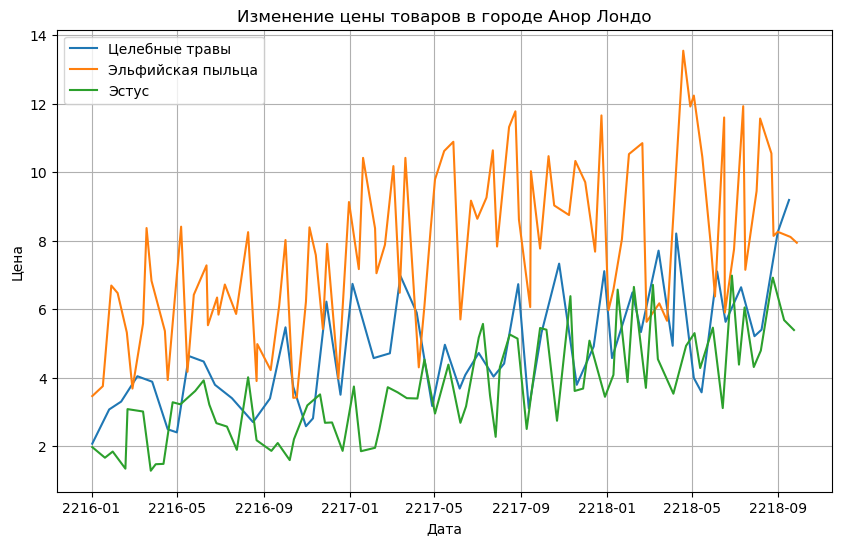

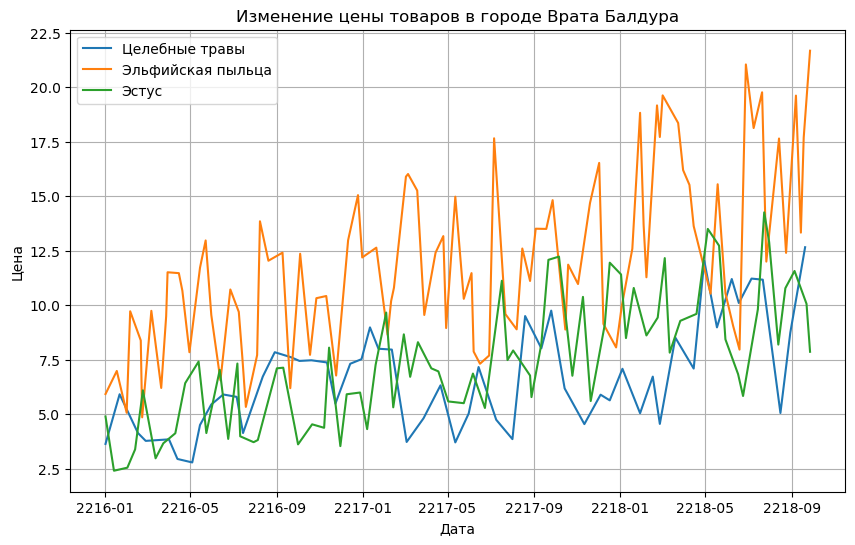

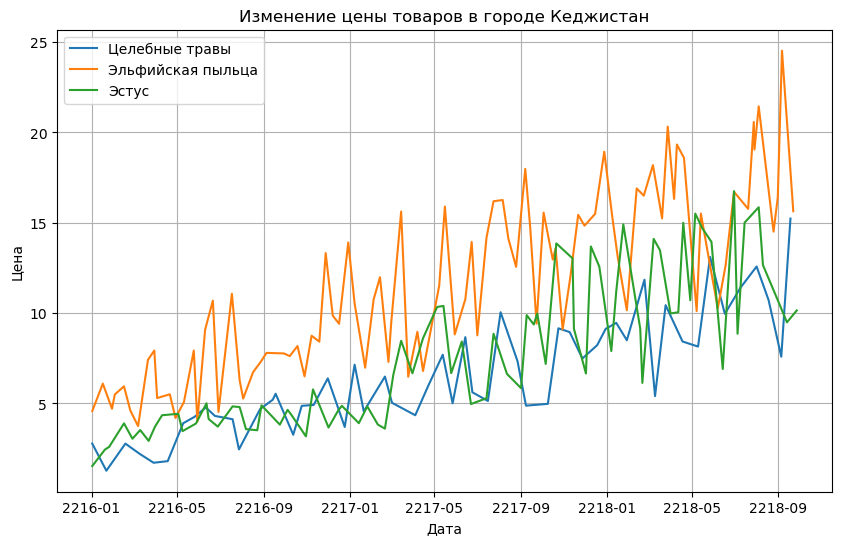

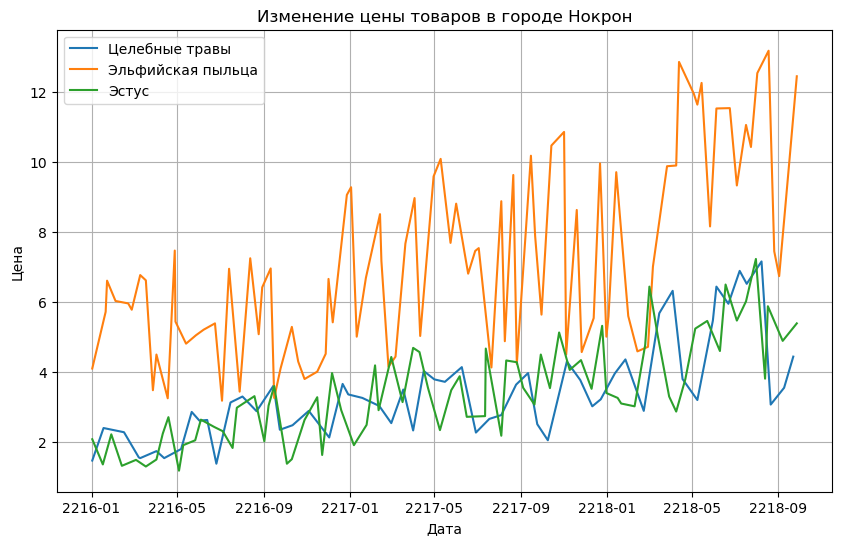

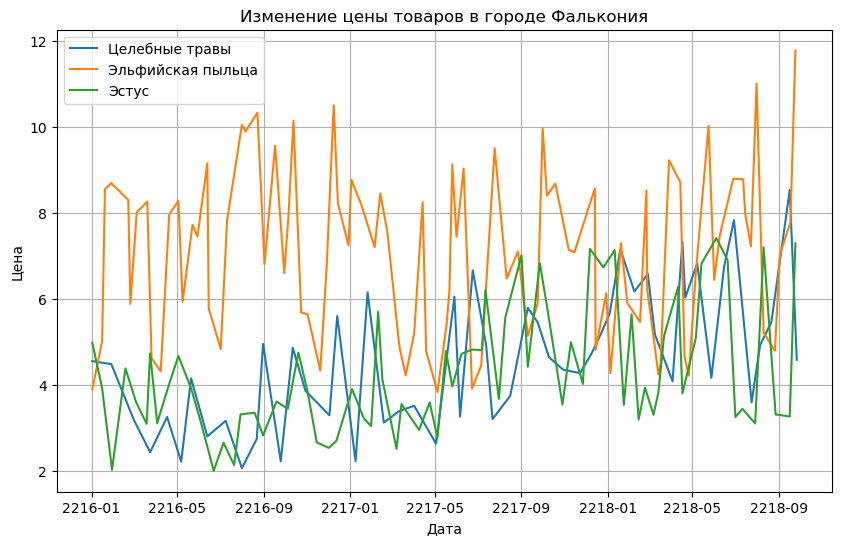

In [47]:
# Составим графики, показывающие изменения цен товаров в каждом городе
# Запишем в переменные названия городов и товаров
cities = df_cost['place'].unique()
products = df_cost['product'].unique()

# Теперь для каждого города построим график изменения цен на товары
for city in cities:
    plt.figure(figsize=(10, 6))
    plt.title(f'Изменение цены товаров в городе {city}')
    
    for product in products:
        # Отфильтруем данные из датафрейма, относящиеся к текущему городу и продукту
        filtered_data = df_cost[(df_cost['place'] == city) & (df_cost['product'] == product)]
        plt.plot(filtered_data['date'], filtered_data['cost'], label=product)
    
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid(True)
    plt.show()

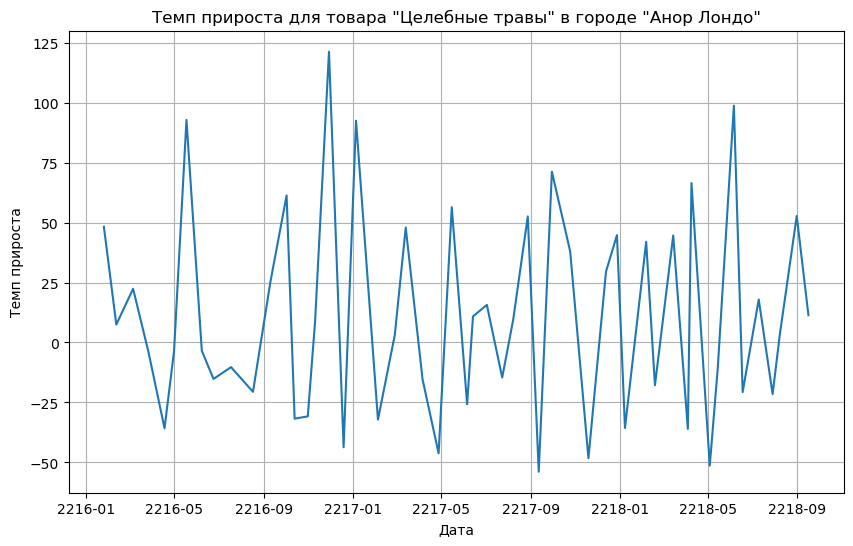

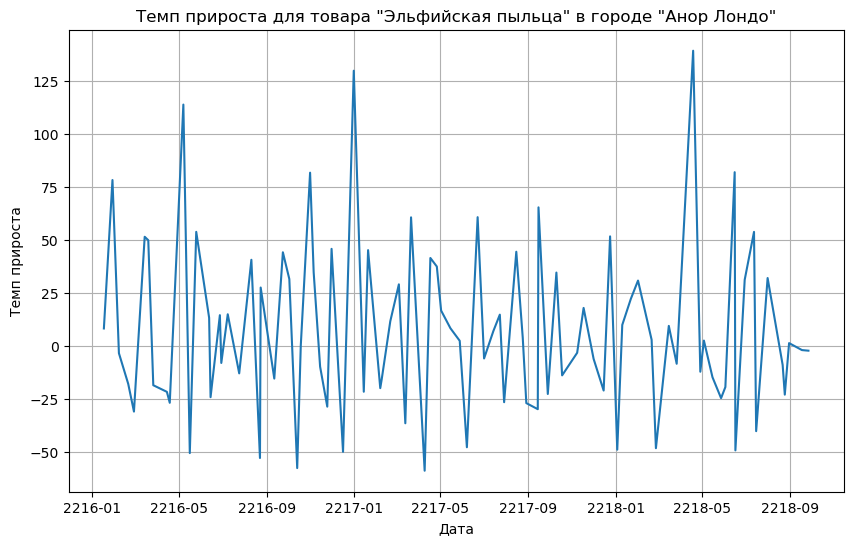

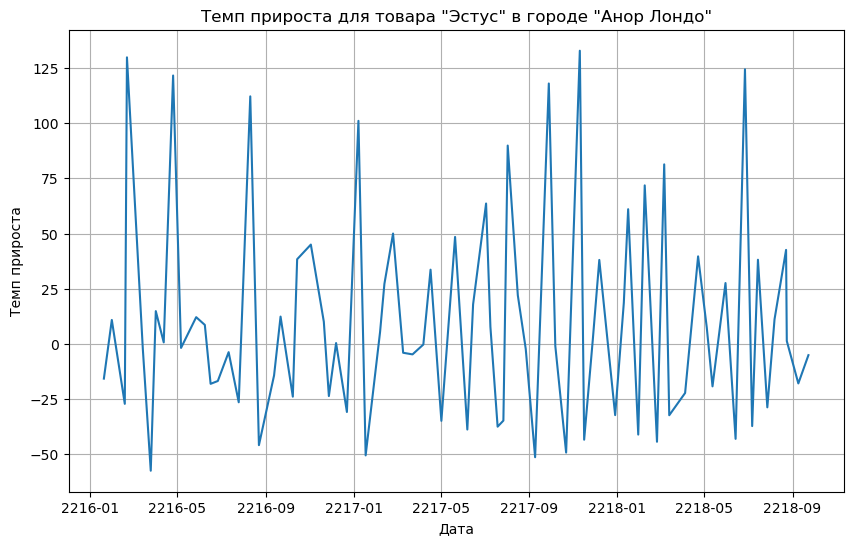

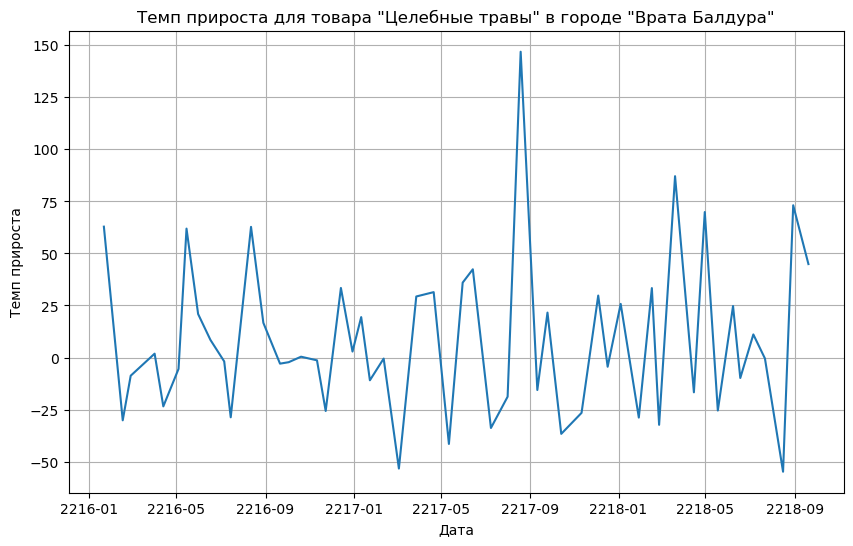

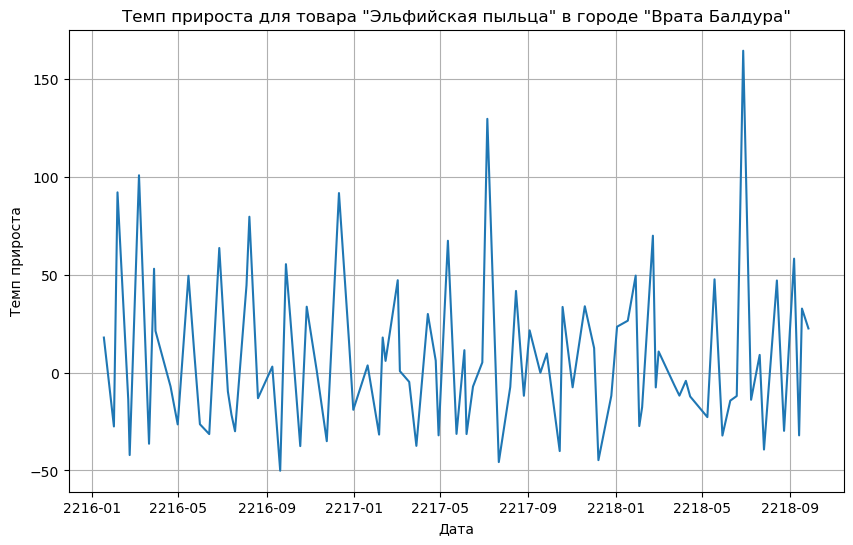

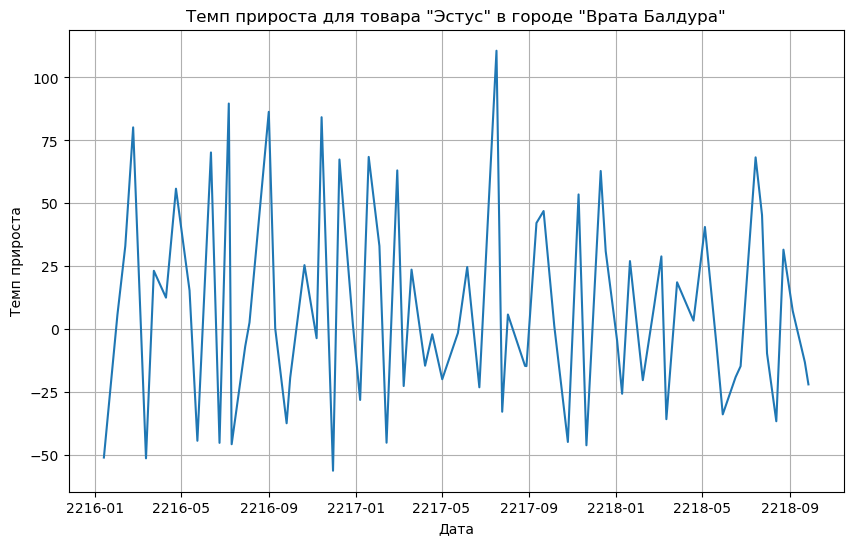

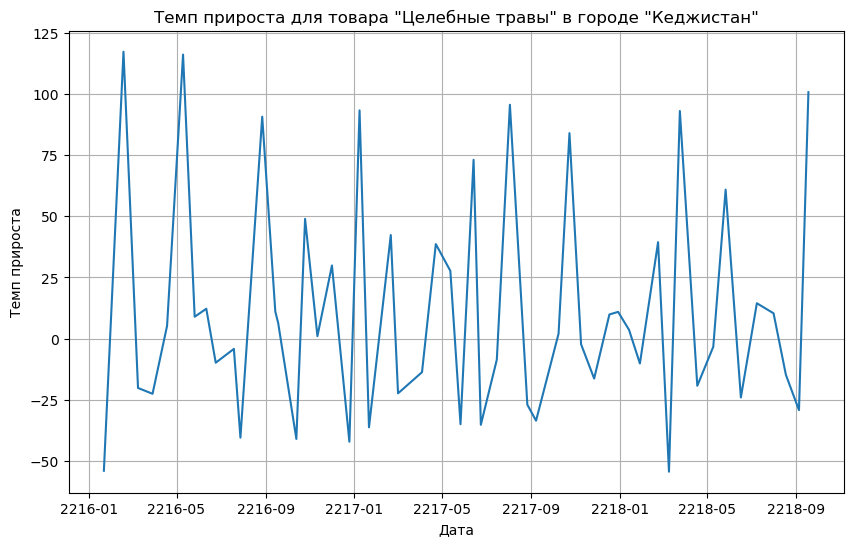

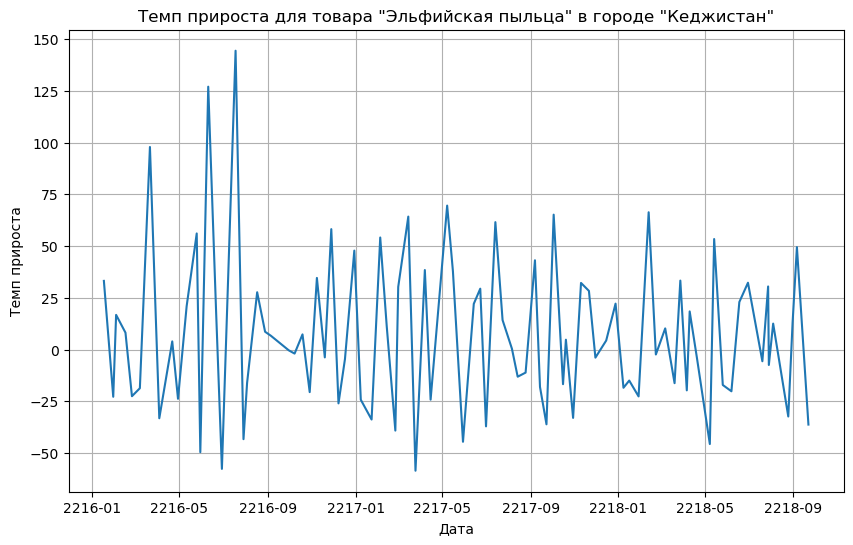

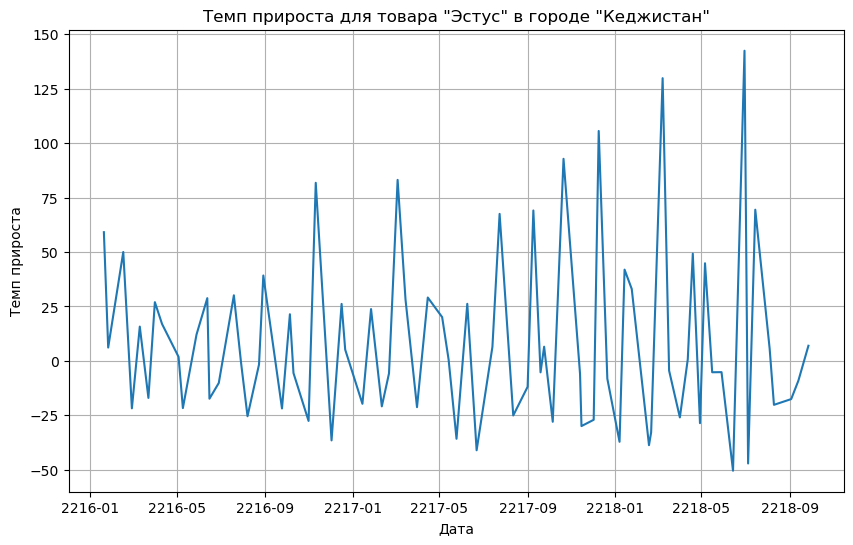

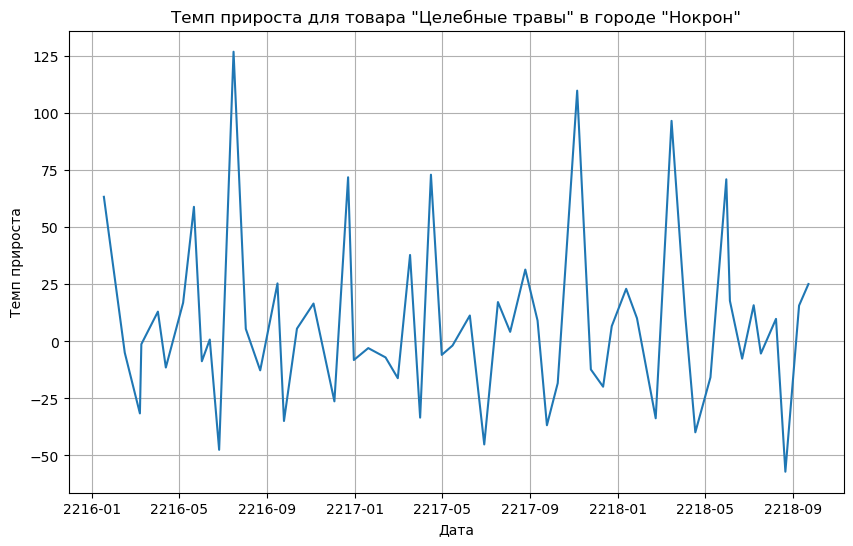

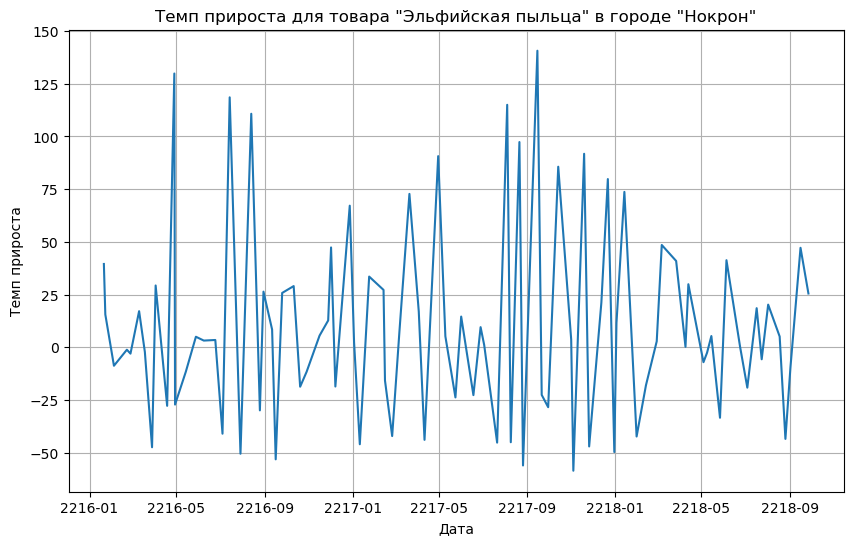

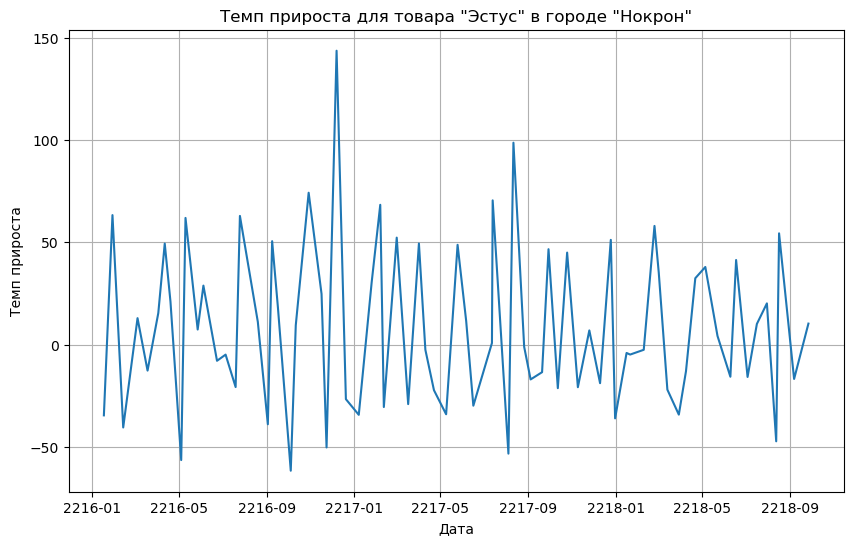

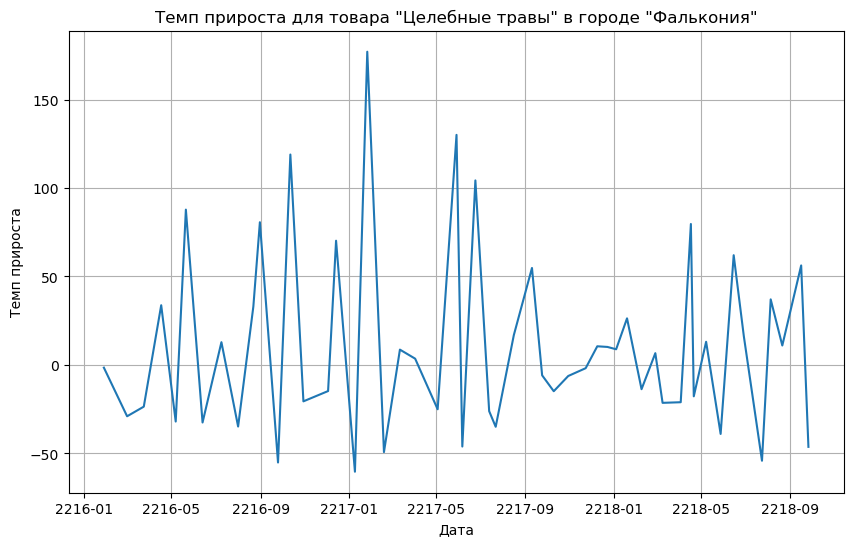

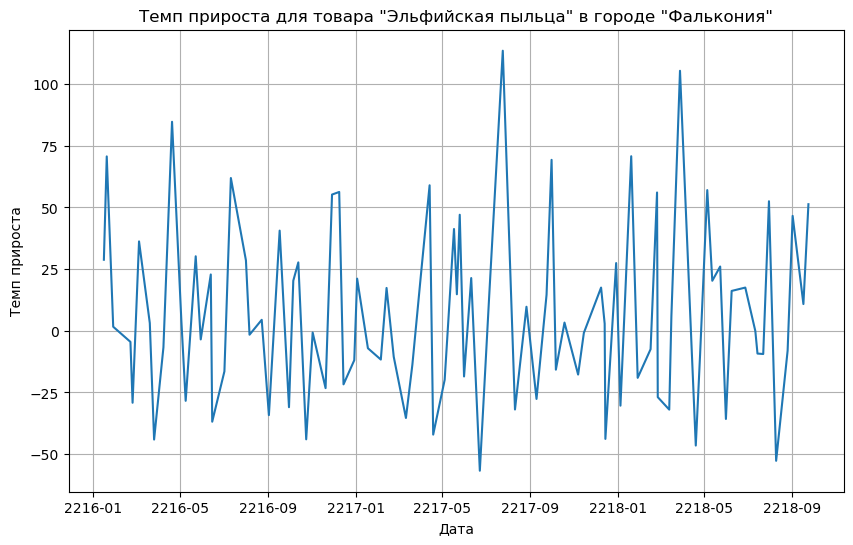

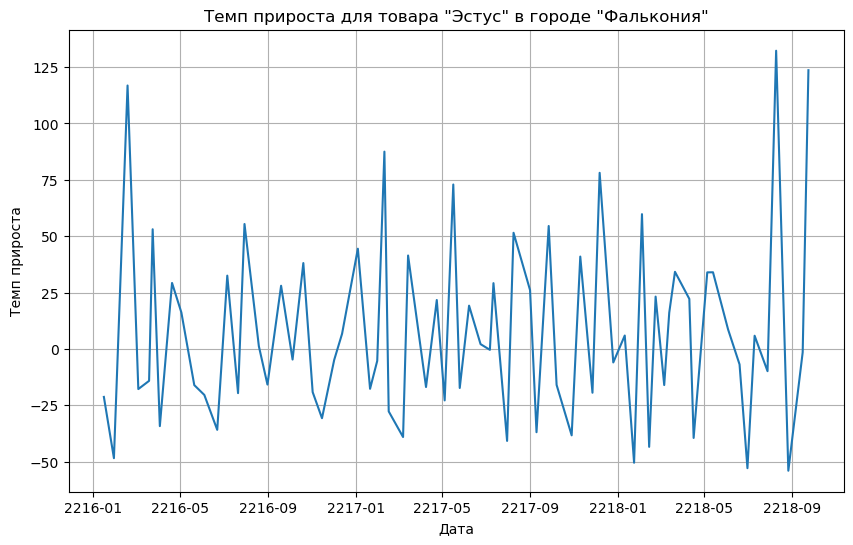

In [48]:
df_cost = df_cost.sort_values('date')

# Добавим столбец 'growth', в котором рассчитаем темпы прироста
df_cost['growth'] = (df_cost.groupby(['place', 'product'])['cost'].diff() / df_cost.groupby(['place', 'product'])['cost'].shift() * 100).round(2)

# Построим графики для визуализации темпов прироста
for city in cities:
    for product in products:
        filtered_data = df_cost[(df_cost['place'] == city) & (df_cost['product'] == product)]
        
        plt.figure(figsize=(10, 6))
        plt.title(f'Темп прироста для товара "{product}" в городе "{city}"')
        plt.plot(filtered_data['date'], filtered_data['growth'], label='Темп прироста')
        
        plt.xlabel('Дата')
        plt.ylabel('Темп прироста')
        plt.grid(True)
        plt.show()

In [49]:
# Создадим таблицу с результатами
table = pd.pivot_table(df_cost, index=['place', 'product'], values=['cost', 'growth'], aggfunc={'cost': 'sum', 'growth': 'last'})

# Рассчитаем средний темп прироста за рассмотренный период для каждого продукта в каждом городе
avg_growth = df_cost.groupby(['place', 'product'])['growth'].mean().round(2)

# Добавим столбец с средним темпом прироста в таблицу с результатами
table['avg_growth'] = avg_growth

# Уберем ненужные столбцы
table.drop(['cost', 'growth'], axis=1, inplace=True)
table

avg_growth
place         product                      
Анор Лондо    Целебные травы          10.94
              Эльфийская пыльца        8.09
              Эстус                   10.45
Врата Балдура Целебные травы           8.63
              Эльфийская пыльца        8.04
              Эстус                    8.01
Кеджистан     Целебные травы          11.85
              Эльфийская пыльца        7.69
              Эстус                    8.94
Нокрон        Целебные травы           7.95
              Эльфийская пыльца       10.01
              Эстус                    8.54
Фалькония     Целебные травы          10.42
              Эльфийская пыльца        7.03
              Эстус                    7.83

Таким образом, мы нашли инфляцию для каждого товара в каждом городе

Мои бесплодные попытки сделать модель...

<a id="4"></a> 
## Анализ себестоимости и цены продажи

In [50]:
# Агрегируем данные о продажам по дням для более удобного анализа
df_transaction['date'] = df_transaction['datetime'].dt.floor('D')
aggregated_df = df_transaction.groupby(['place', 'product', 'date']).agg({'price': 'first', 'amount': 'sum'}).reset_index()
aggregated_df

place         product       date  price     amount
0      Анор Лондо  Целебные травы 2216-01-02   3.90  37.802874
1      Анор Лондо  Целебные травы 2216-01-03   3.90  43.264844
2      Анор Лондо  Целебные травы 2216-01-04   3.90  35.629889
3      Анор Лондо  Целебные травы 2216-01-05   3.90  37.474104
4      Анор Лондо  Целебные травы 2216-01-06   3.90  48.586827
...           ...             ...        ...    ...        ...
14993   Фалькония           Эстус 2218-09-23   9.28  58.409777
14994   Фалькония           Эстус 2218-09-24   9.28  48.620474
14995   Фалькония           Эстус 2218-09-25   9.28  59.634726
14996   Фалькония           Эстус 2218-09-26   9.28  52.100924
14997   Фалькония           Эстус 2218-09-27   9.28  44.656157

[14998 rows x 5 columns]

In [51]:
df_cost

place            product   cost       date  growth
0        Анор Лондо     Целебные травы   2.07 2216-01-02     NaN
161          Нокрон     Целебные травы   1.47 2216-01-02     NaN
219       Фалькония     Целебные травы   4.55 2216-01-02     NaN
272      Анор Лондо  Эльфийская пыльца   3.46 2216-01-02     NaN
366   Врата Балдура  Эльфийская пыльца   5.92 2216-01-02     NaN
...             ...                ...    ...        ...     ...
1043         Нокрон              Эстус   5.39 2218-09-27   10.22
889   Врата Балдура              Эстус   7.86 2218-09-27  -21.87
967       Кеджистан              Эстус  10.15 2218-09-27    6.95
459   Врата Балдура  Эльфийская пыльца  21.68 2218-09-27   22.56
365      Анор Лондо  Эльфийская пыльца   7.94 2218-09-27   -2.10

[1117 rows x 5 columns]

In [52]:
# Объединим данные о продажах и себестоимости по городу, продукту и дате
price_data = pd.merge(aggregated_df, df_cost, on=['place', 'product', 'date'], how='inner')

# Вычислим наценку на товары
price_data['margin'] = price_data['price'] - price_data['cost']
price_data

place         product       date  price     amount  cost  growth  \
0     Анор Лондо  Целебные травы 2216-01-02   3.90  37.802874  2.07     NaN   
1     Анор Лондо  Целебные травы 2216-01-26   4.30  44.175612  3.07   48.31   
2     Анор Лондо  Целебные травы 2216-02-12   4.60  29.264602  3.30    7.49   
3     Анор Лондо  Целебные травы 2216-03-06   5.07  42.330632  4.04   22.42   
4     Анор Лондо  Целебные травы 2216-03-27   5.57  41.953721  3.88   -3.96   
...          ...             ...        ...    ...        ...   ...     ...   
1112   Фалькония           Эстус 2218-07-29   9.69  45.968194  3.10   -9.88   
1113   Фалькония           Эстус 2218-08-10   9.56  45.903630  7.20  132.26   
1114   Фалькония           Эстус 2218-08-27   9.29  41.855249  3.31  -54.03   
1115   Фалькония           Эстус 2218-09-16   9.13  43.729210  3.26   -1.51   
1116   Фалькония           Эстус 2218-09-24   9.28  48.620474  7.29  123.62   

      margin  
0       1.83  
1       1.23  
2       1.30  
3       1.03  
4       1.69  
...      ...  
1112    6.59  
1113    2.36  
1114    5.98  
1115    5.87  
1116    1.99  

[1117 rows x 8 columns]

In [53]:
# Посмотрим среднюю наценку на товары в каждом городе
price_data.groupby(['place', 'product'])['margin'].mean()

place          product          
Анор Лондо     Целебные травы       4.002453
               Эльфийская пыльца    6.750638
               Эстус                3.214810
Врата Балдура  Целебные травы       5.188889
               Эльфийская пыльца    9.281596
               Эстус                6.372933
Кеджистан      Целебные травы       4.588704
               Эльфийская пыльца    8.841739
               Эстус                6.588077
Нокрон         Целебные травы       2.535862
               Эльфийская пыльца    5.787363
               Эстус                2.922895
Фалькония      Целебные травы       3.741698
               Эльфийская пыльца    5.738925
               Эстус                3.979726
Name: margin, dtype: float64

In [54]:
# Добавим столбец с номером дня для последующего построения модели
price_data['day_number'] = (price_data['date'] - price_data['date'].min()).dt.days
price_data

place         product       date  price     amount  cost  growth  \
0     Анор Лондо  Целебные травы 2216-01-02   3.90  37.802874  2.07     NaN   
1     Анор Лондо  Целебные травы 2216-01-26   4.30  44.175612  3.07   48.31   
2     Анор Лондо  Целебные травы 2216-02-12   4.60  29.264602  3.30    7.49   
3     Анор Лондо  Целебные травы 2216-03-06   5.07  42.330632  4.04   22.42   
4     Анор Лондо  Целебные травы 2216-03-27   5.57  41.953721  3.88   -3.96   
...          ...             ...        ...    ...        ...   ...     ...   
1112   Фалькония           Эстус 2218-07-29   9.69  45.968194  3.10   -9.88   
1113   Фалькония           Эстус 2218-08-10   9.56  45.903630  7.20  132.26   
1114   Фалькония           Эстус 2218-08-27   9.29  41.855249  3.31  -54.03   
1115   Фалькония           Эстус 2218-09-16   9.13  43.729210  3.26   -1.51   
1116   Фалькония           Эстус 2218-09-24   9.28  48.620474  7.29  123.62   

      margin  day_number  
0       1.83           0  
1       1.23          24  
2       1.30          41  
3       1.03          64  
4       1.69          85  
...      ...         ...  
1112    6.59         939  
1113    2.36         951  
1114    5.98         968  
1115    5.87         988  
1116    1.99         996  

[1117 rows x 9 columns]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создадим список для хранения предсказанных цен
predictions = []

# Произведем итерацию по каждому товару и городу
for product in products:
    for city in cities:
        # Создадим временный датафрейм для хранения предсказанных цен
        temp_df = pd.DataFrame(range(1, 91), columns=["day_num"])
        
        # Отфильтруем данные для текущего товара и города
        data = price_data[(price_data['product'] == product) & (price_data['place'] == city)]

        if not data.empty:
            # Подгтовим входные данные и целевые переменные
            x = data['day_number'].values.reshape(-1, 1)  
            y = data['price'].values

            # Разделим данные на обучающую и тестовую выборки в отношении 80 на 20
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
            
            # Обучим модель линейной регрессии
            regression_model = LinearRegression()
            regression_model.fit(x_train, y_train)
            
            # Определим последнюю дату в данных и спрогнозируем цены на следующие 90 дней с помощью обученной модели
            last_date = data['date'].max()
            next_days = pd.date_range(start=last_date, periods=90, freq='D')
            next_days_num = np.array((next_days - data['date'].min()).days.tolist()).reshape(-1, 1)
            predicted_prices = regression_model.predict(next_days_num)
            
            # Сохраним полученные данные во временном датафрейме
            temp_df["place"] = city
            temp_df["product"] = product
            temp_df["price"] = predicted_prices
            
            # Добавим полученные данные в прогнозный датафрейм
            predictions.append(temp_df)

# Объединим все полученные данные в один датафрейм 
predictions = pd.concat(predictions)
predictions

day_num       place         product      price
0         1  Анор Лондо  Целебные травы  12.324933
1         2  Анор Лондо  Целебные травы  12.332258
2         3  Анор Лондо  Целебные травы  12.339583
3         4  Анор Лондо  Целебные травы  12.346908
4         5  Анор Лондо  Целебные травы  12.354232
..      ...         ...             ...        ...
85       86   Фалькония           Эстус  10.621149
86       87   Фалькония           Эстус  10.625200
87       88   Фалькония           Эстус  10.629250
88       89   Фалькония           Эстус  10.633301
89       90   Фалькония           Эстус  10.637352

[1350 rows x 4 columns]

Эта модель не учитывает изначальные условия, данные в задании, так что это только черновик

<a id="5"></a> 
## Сравнение цен конкурентов и цен нашей компании

In [56]:
df_competitors

place         product    competitor  price       date
0      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-04
1      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-05
2      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-06
3      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-09
4      Анор Лондо  Целебные травы   Арториас&Co   3.78 2216-01-11
...           ...             ...           ...    ...        ...
31794   Фалькония           Эстус  Светлые Души  14.99 2218-09-17
31795   Фалькония           Эстус  Светлые Души  15.36 2218-09-20
31796   Фалькония           Эстус  Светлые Души  15.36 2218-09-22
31797   Фалькония           Эстус  Светлые Души  15.36 2218-09-23
31798   Фалькония           Эстус  Светлые Души  15.36 2218-09-24

[31799 rows x 5 columns]

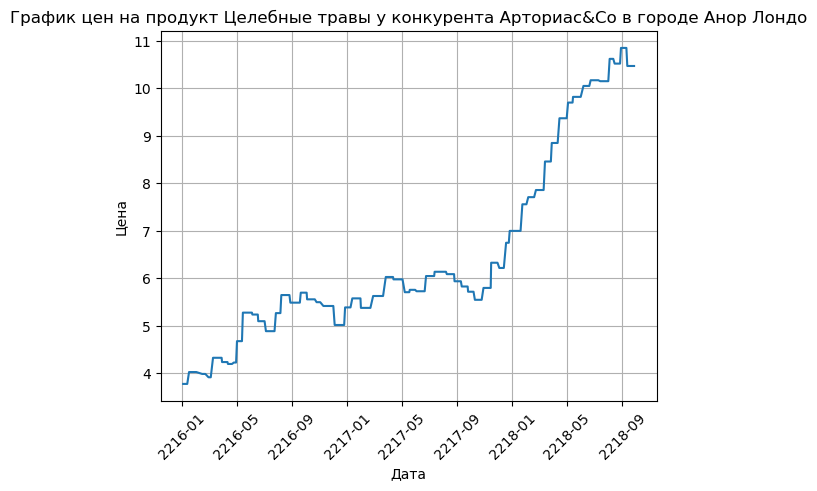

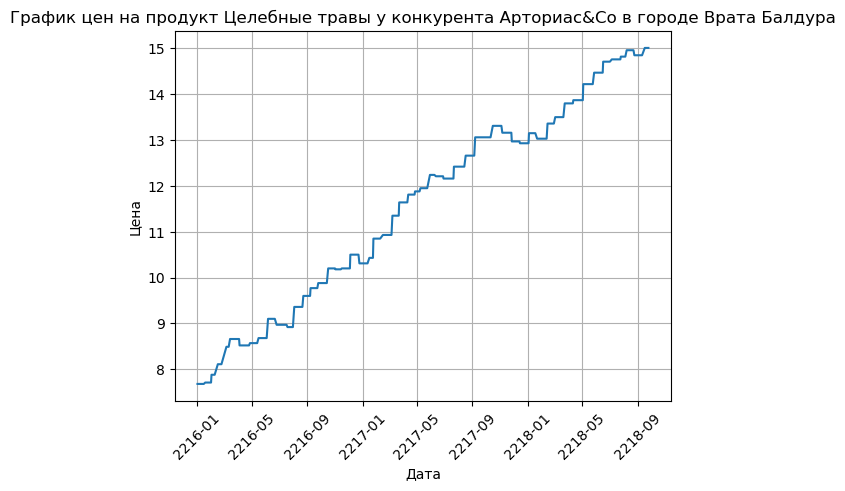

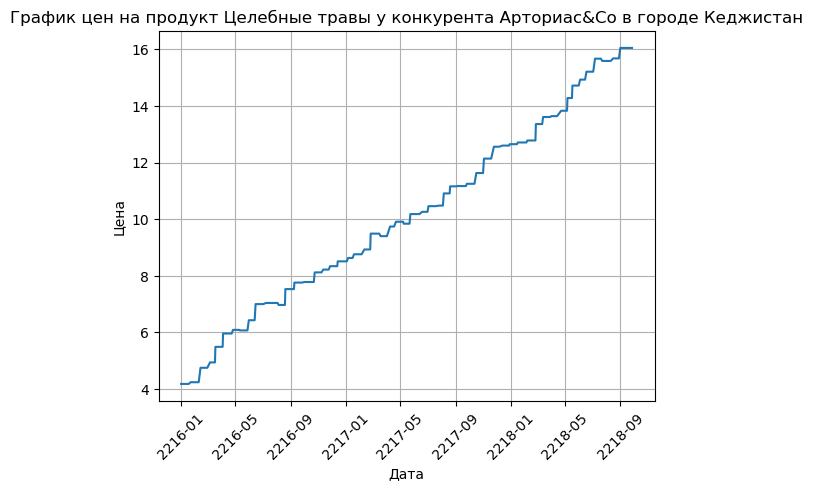

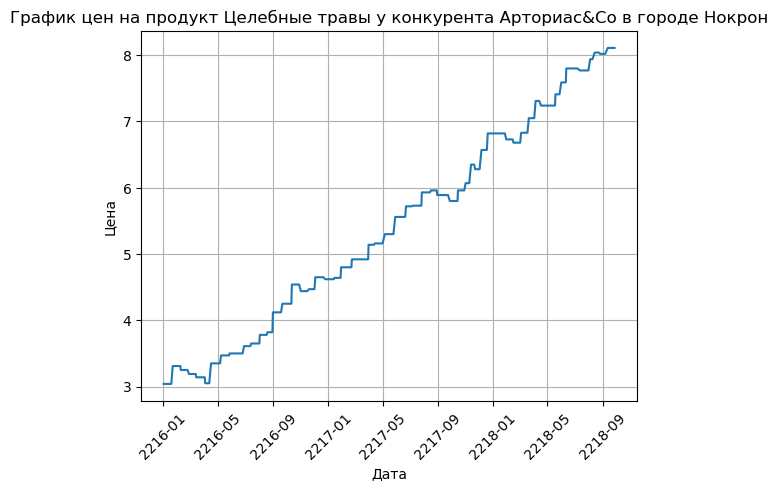

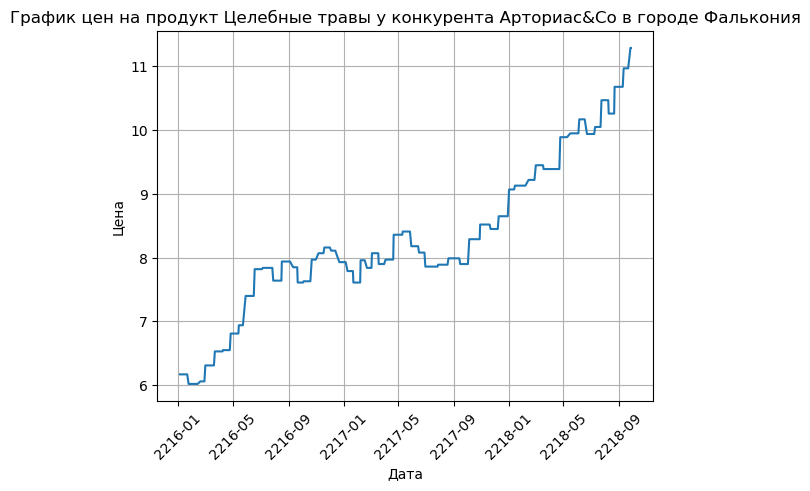

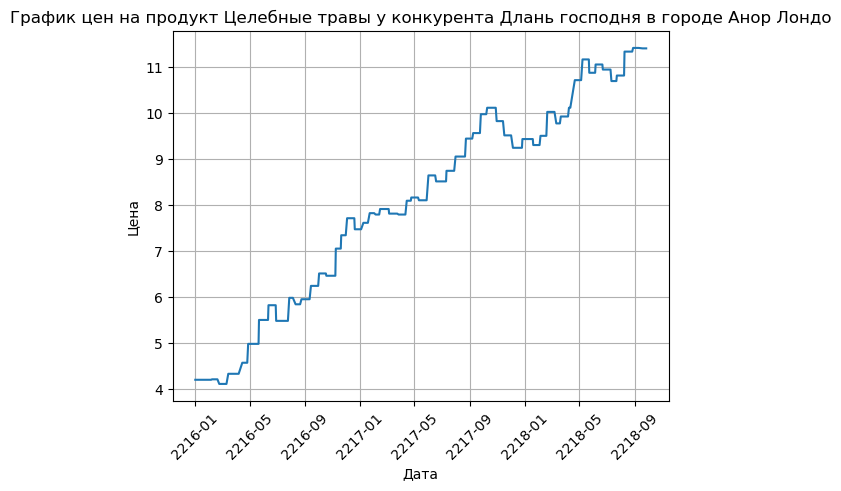

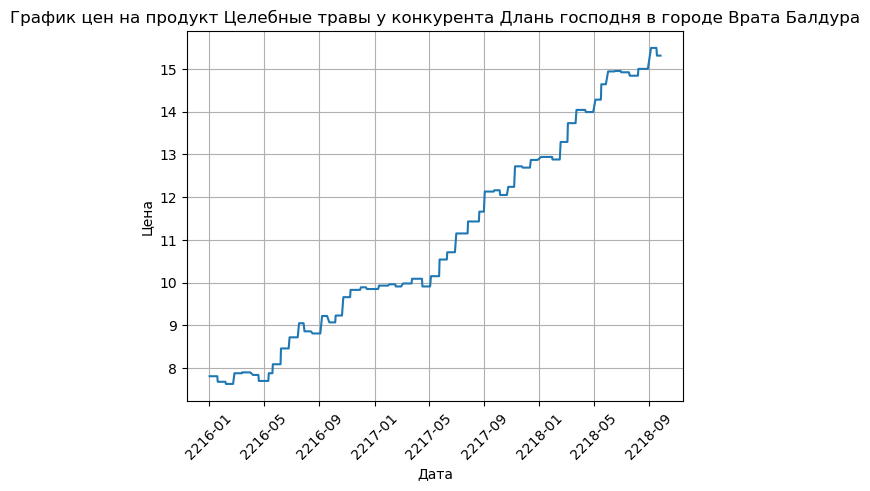

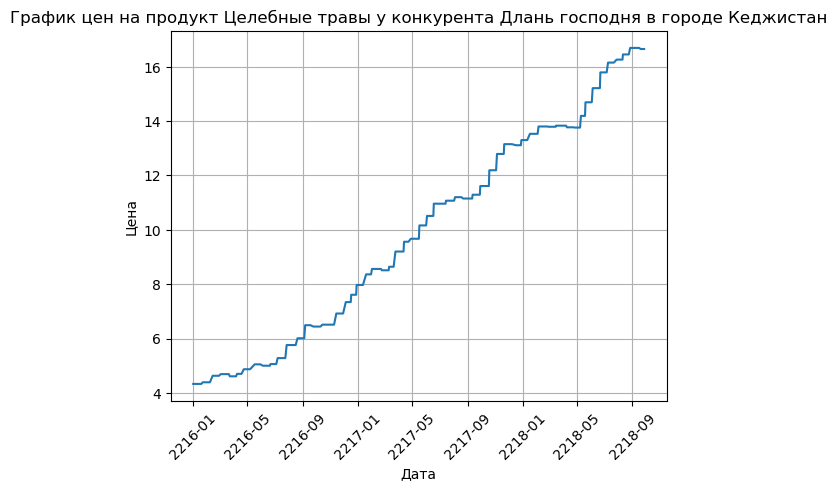

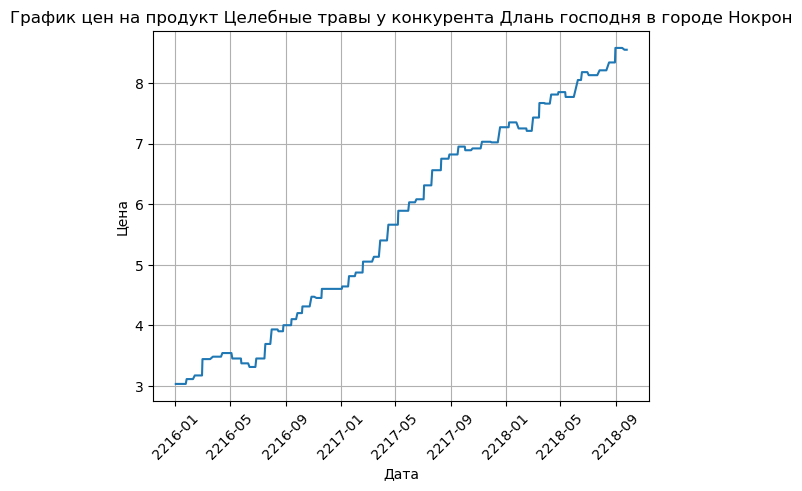

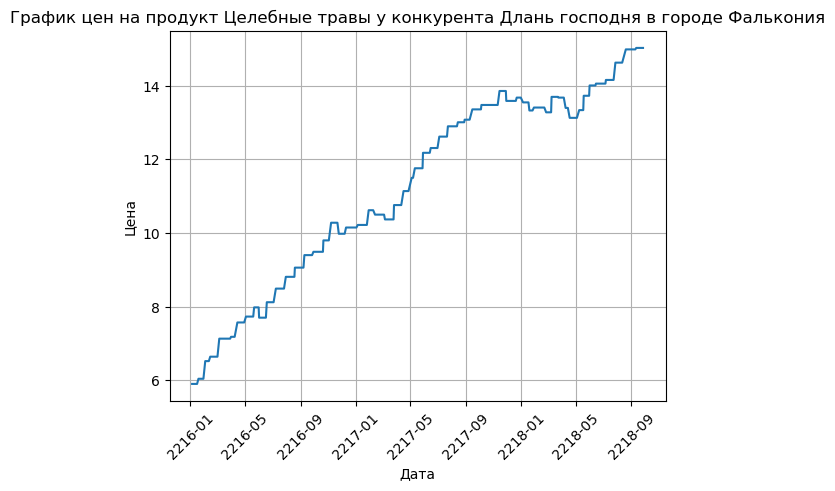

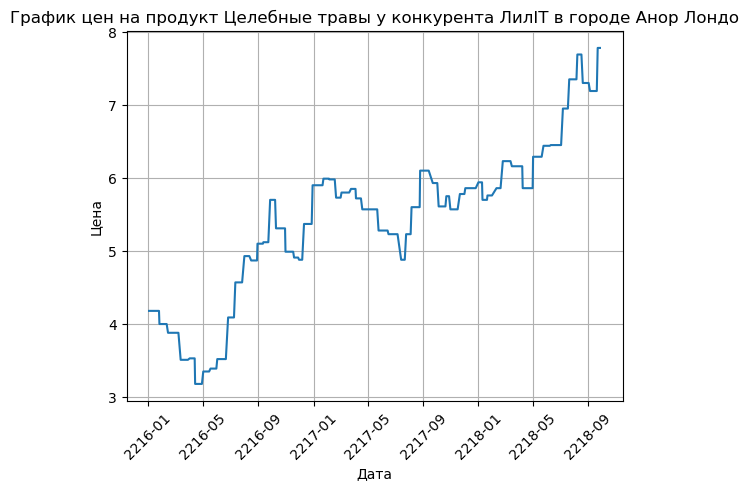

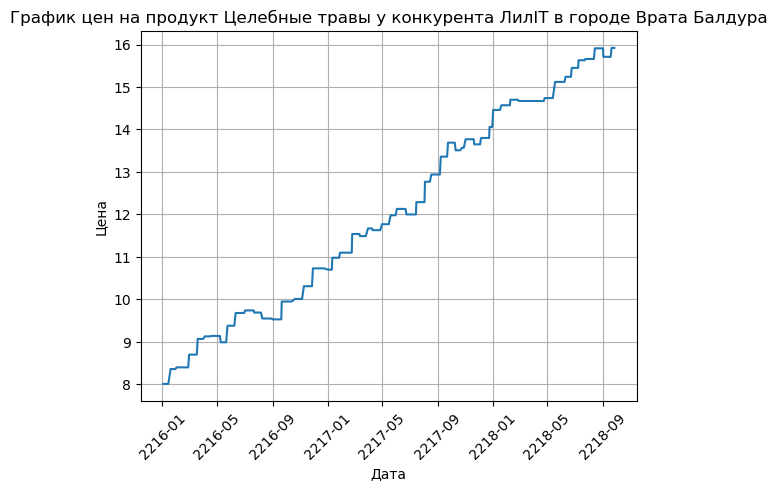

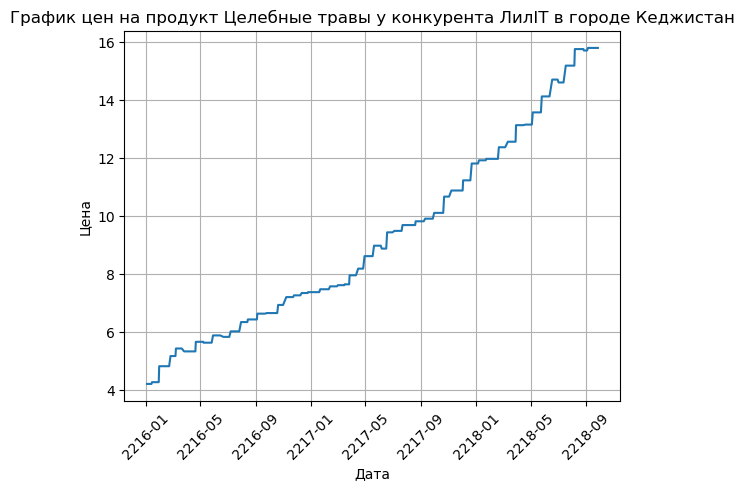

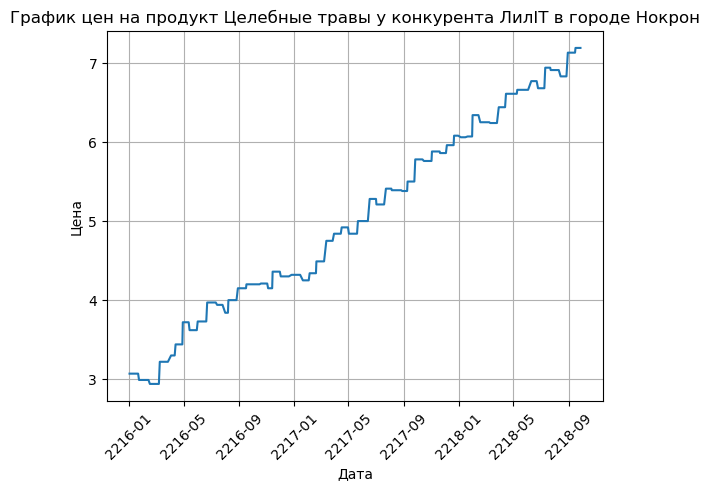

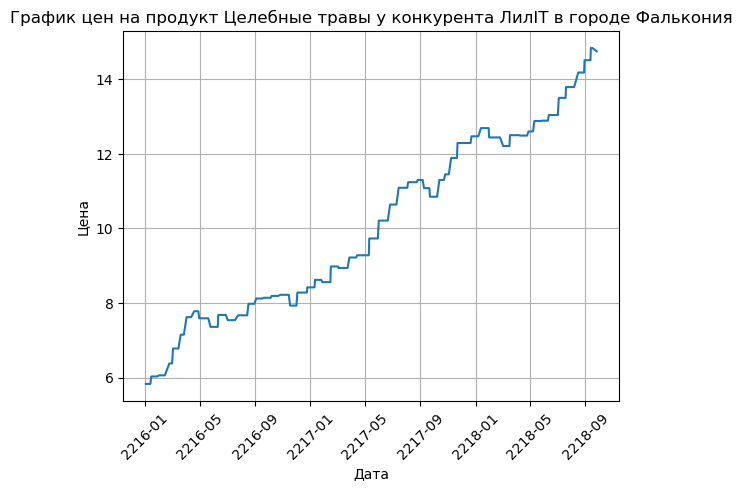

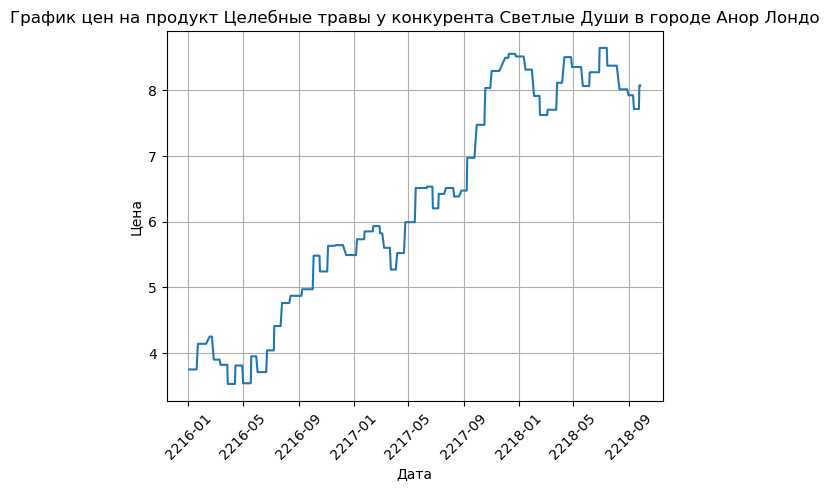

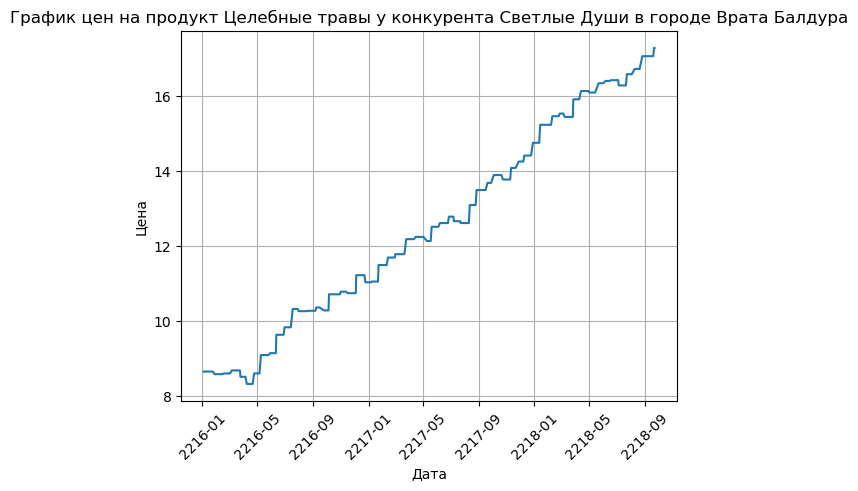

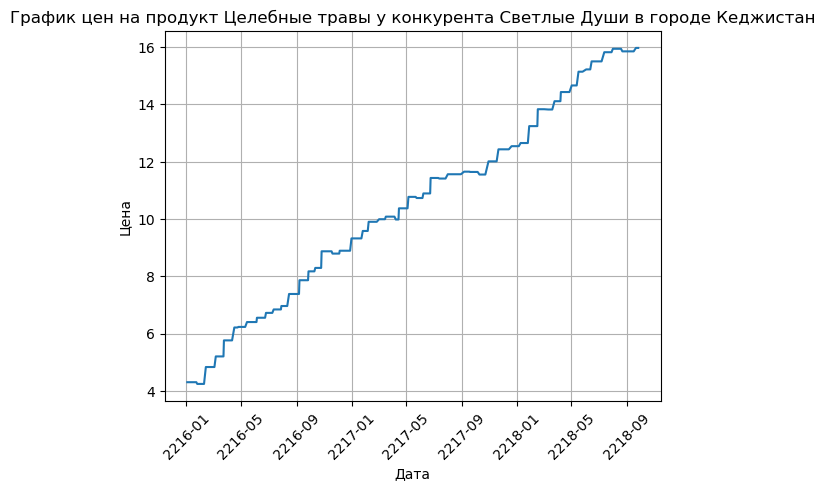

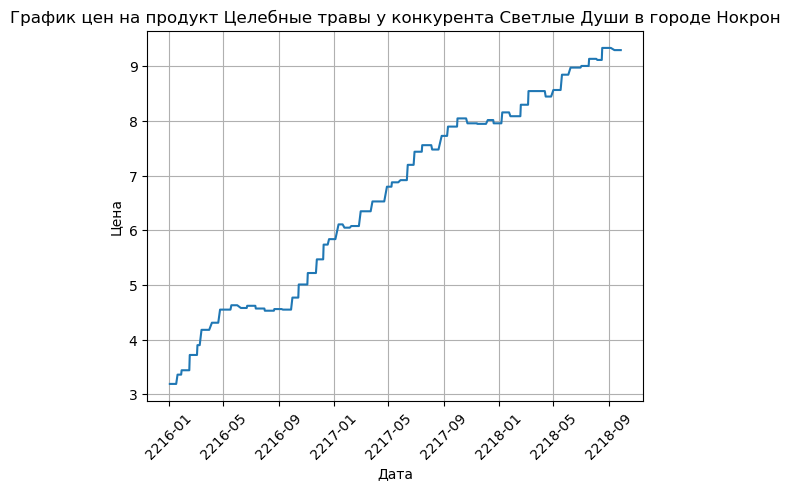

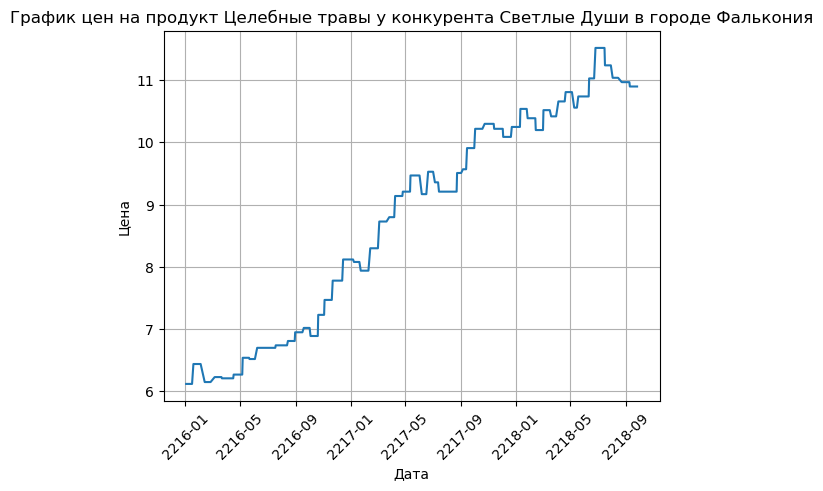

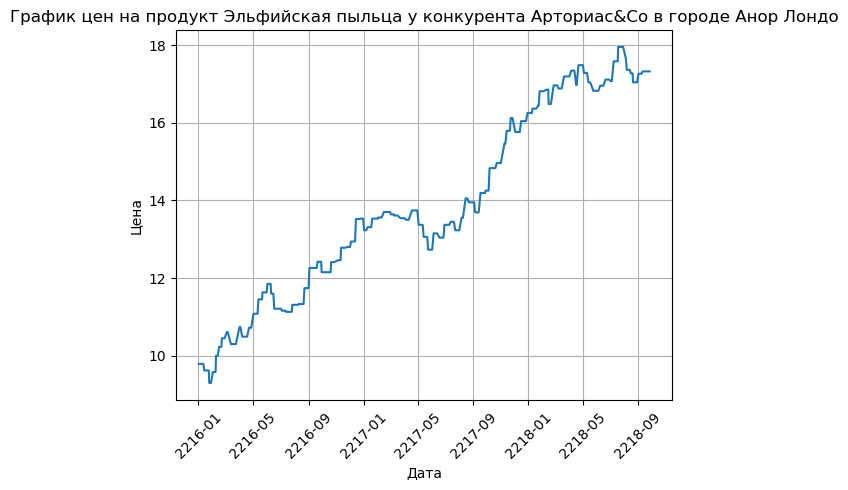

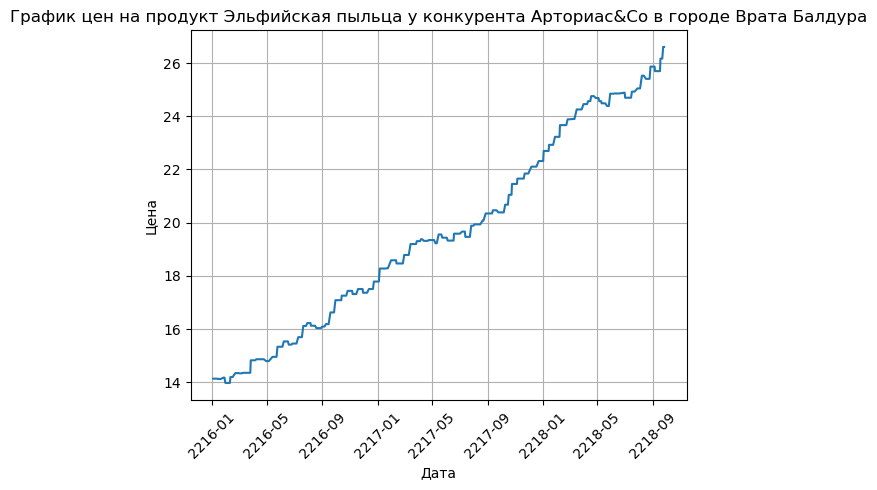

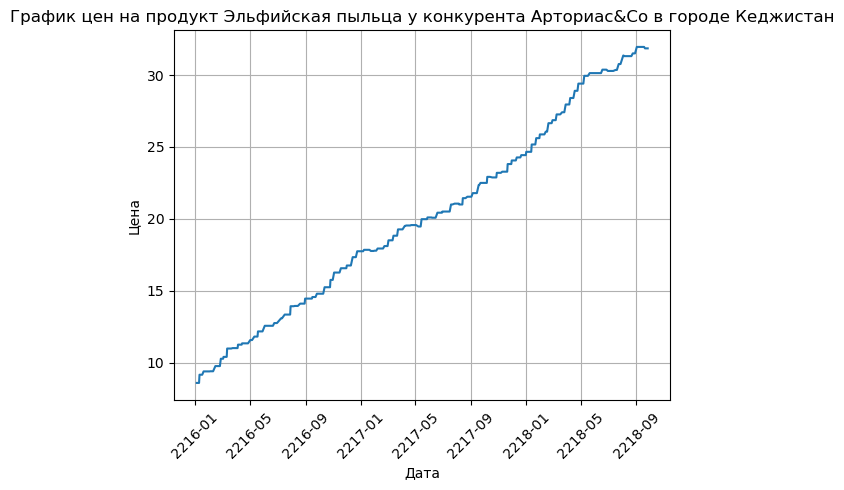

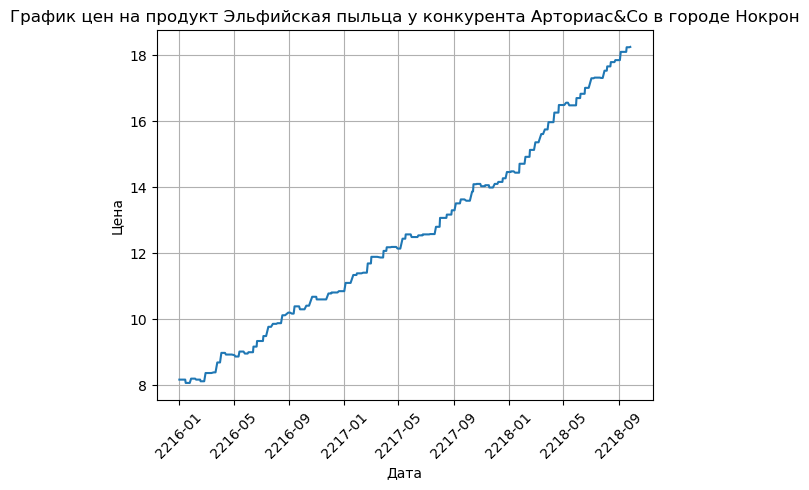

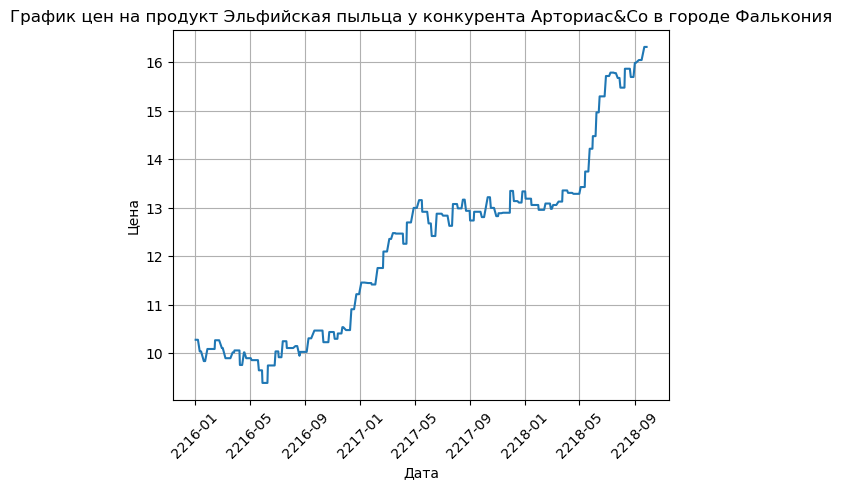

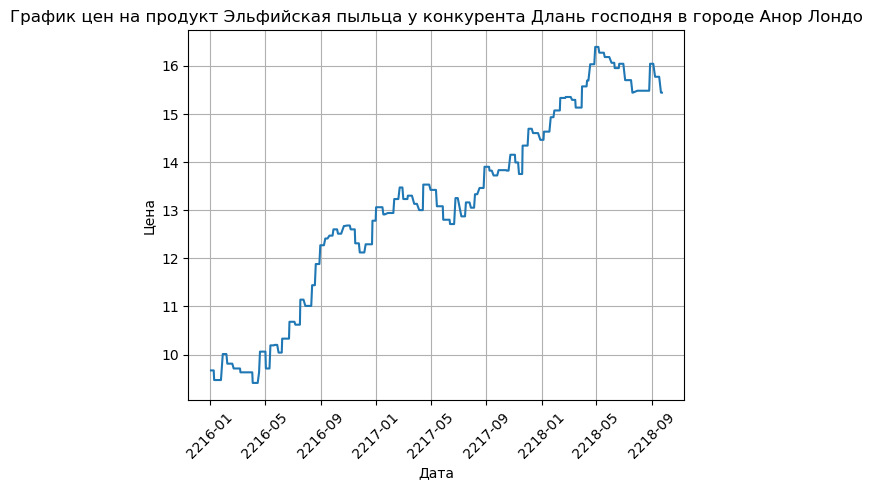

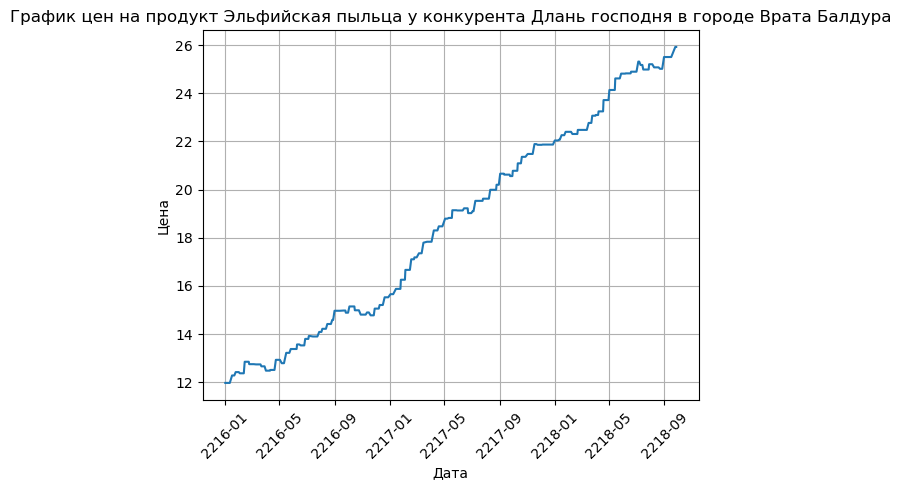

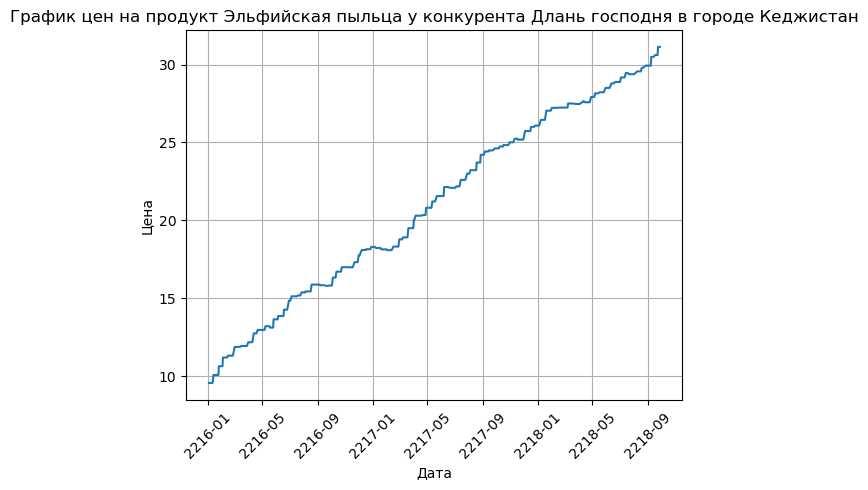

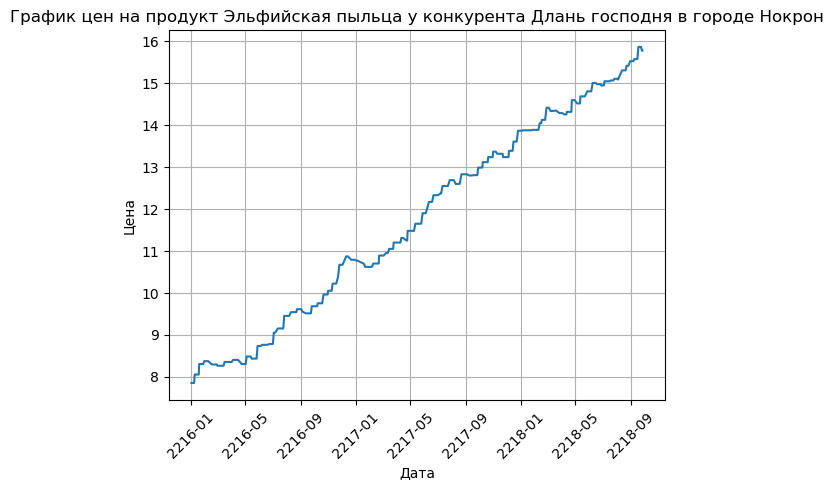

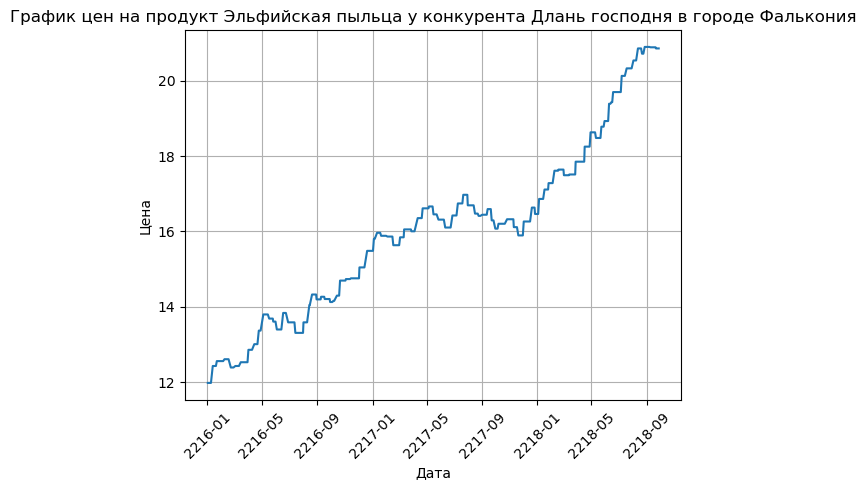

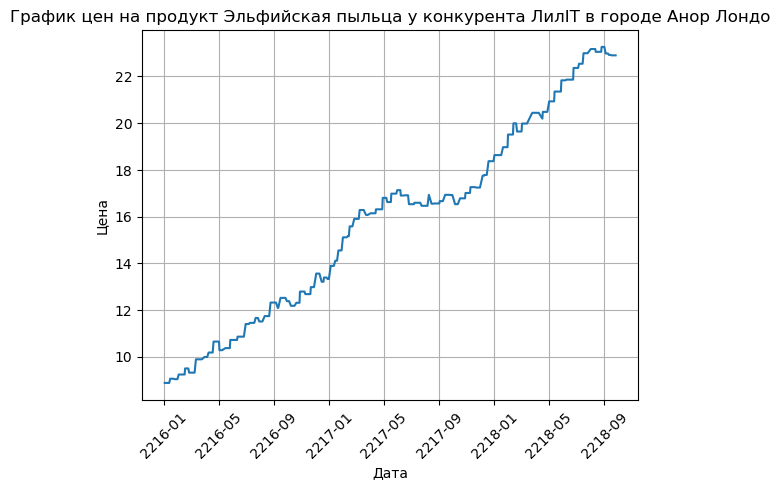

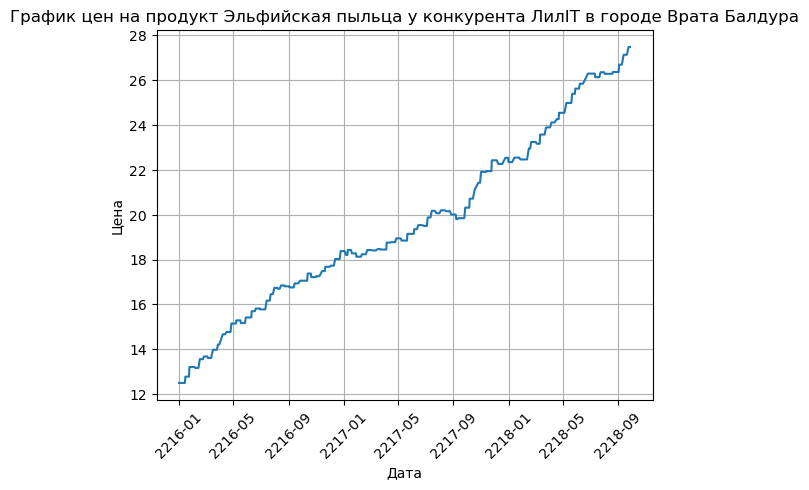

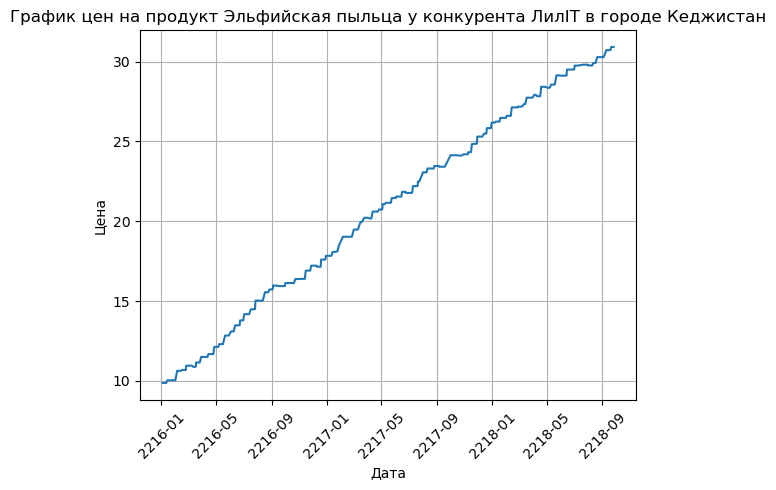

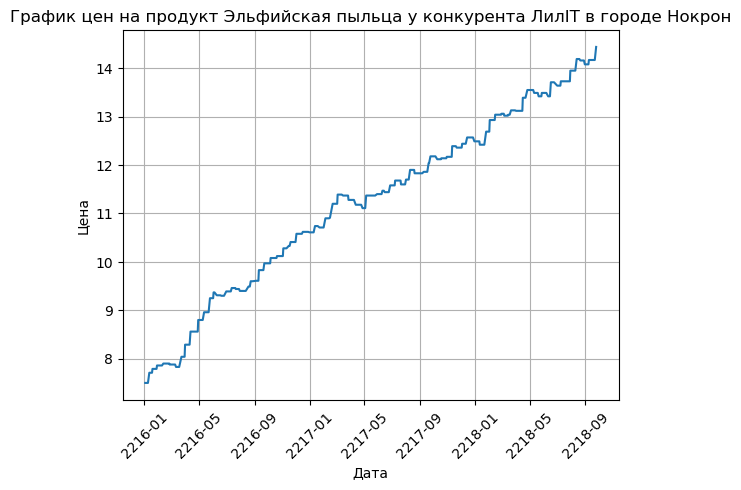

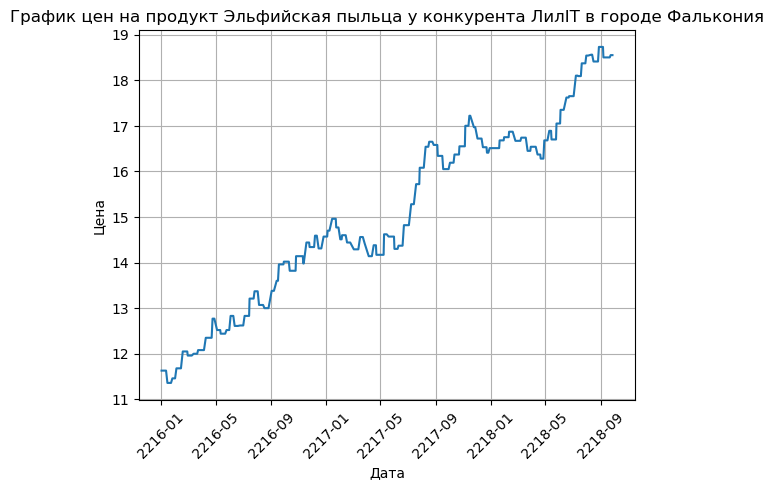

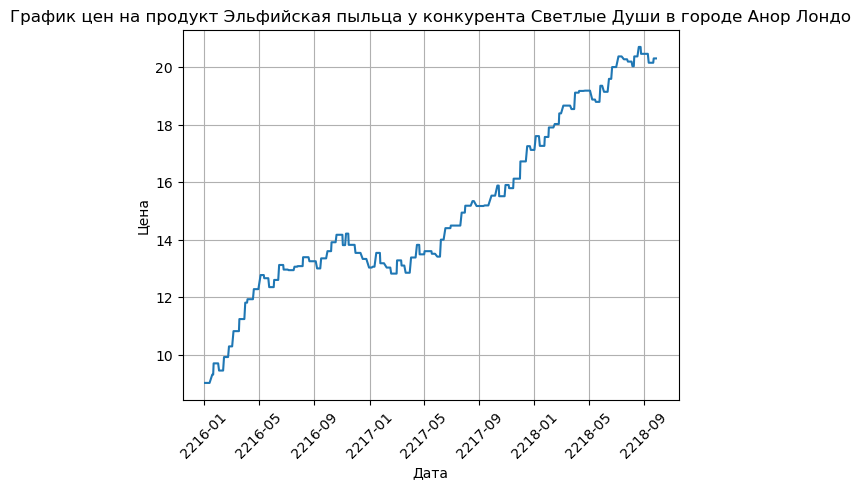

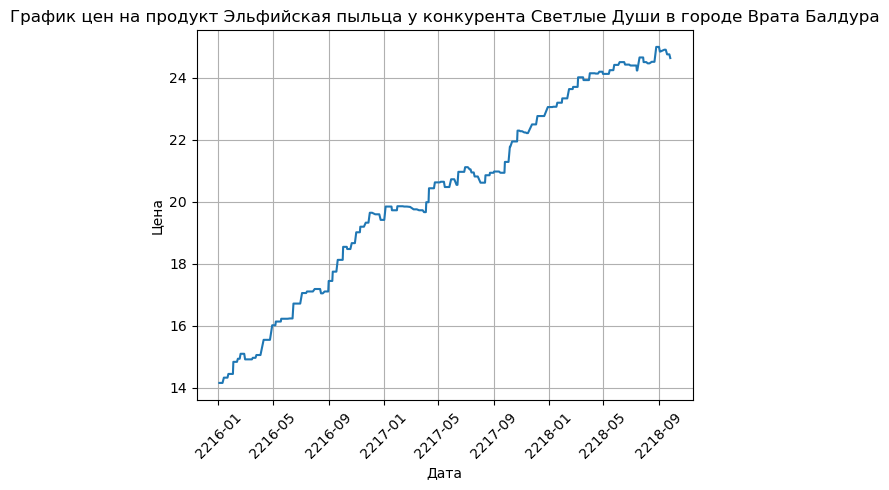

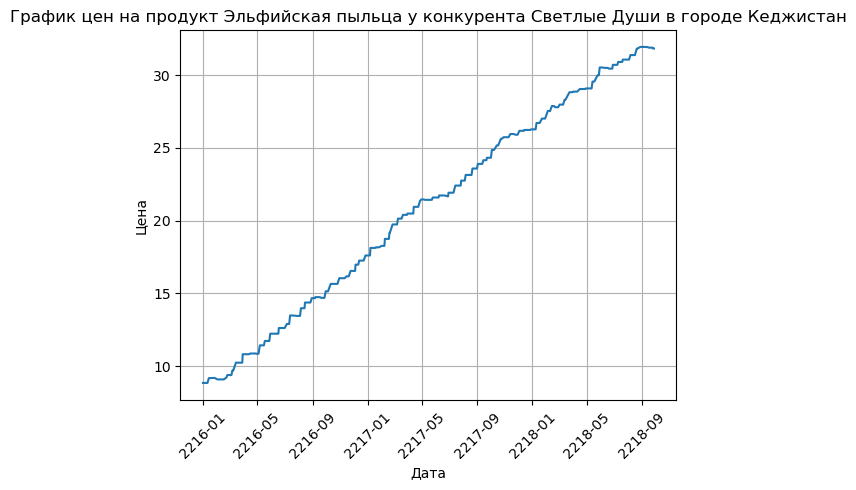

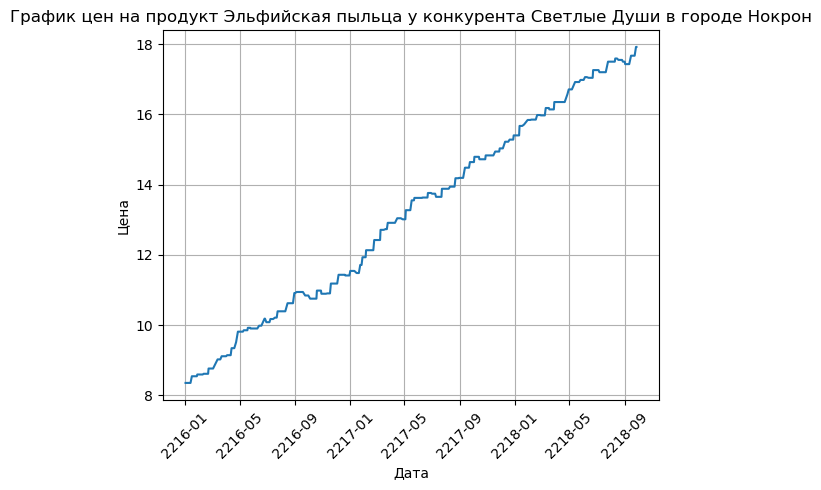

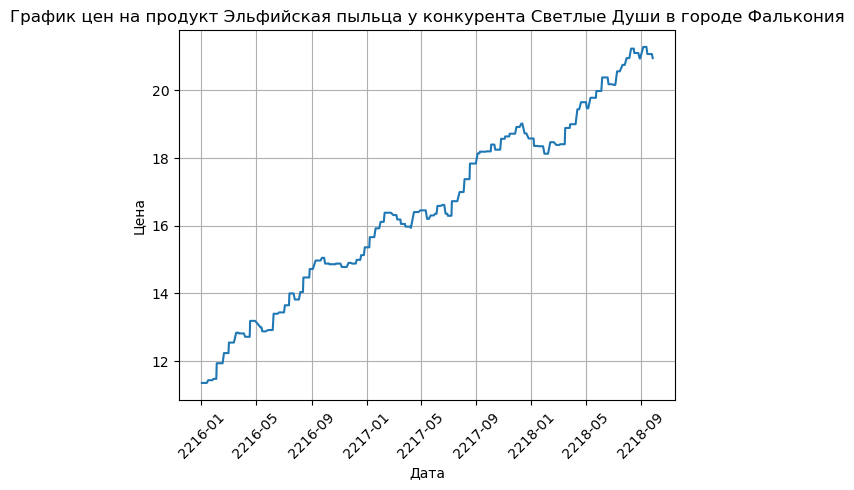

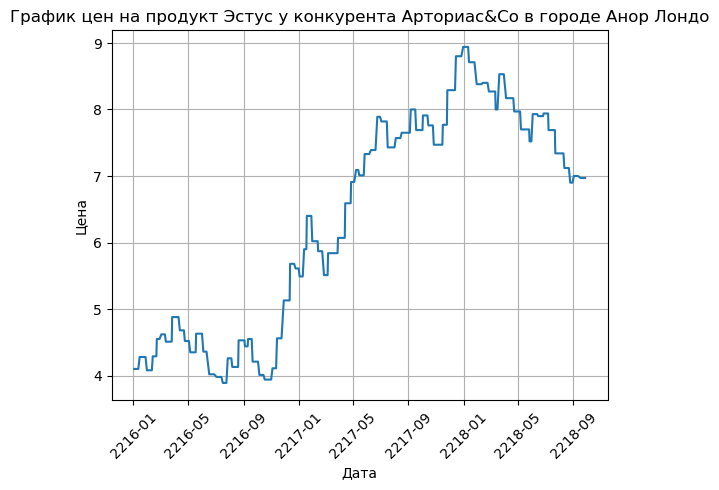

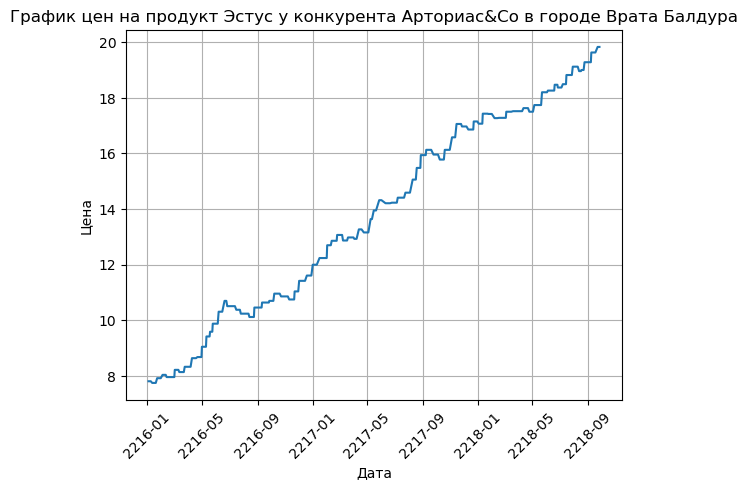

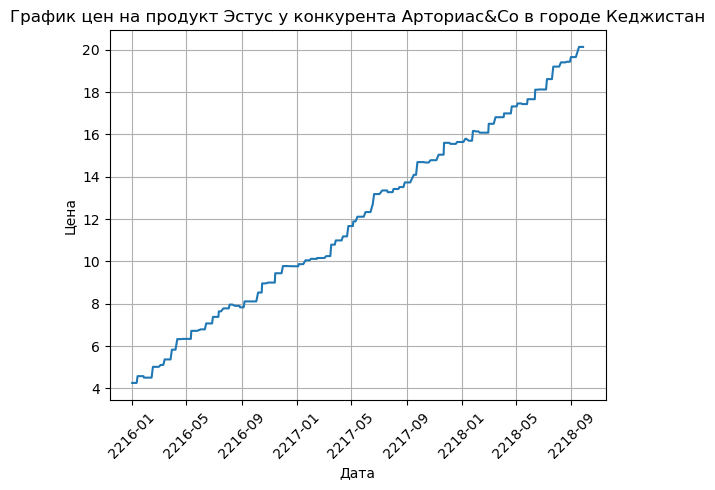

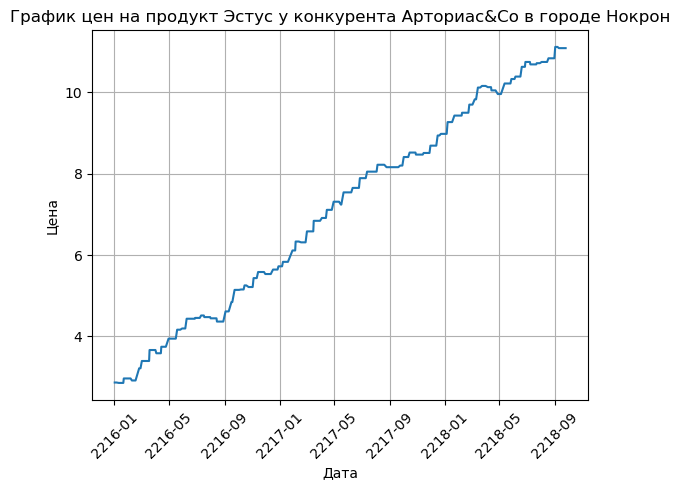

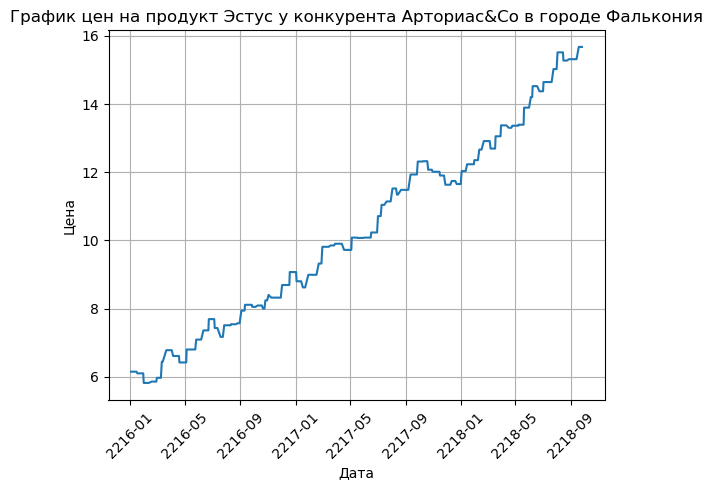

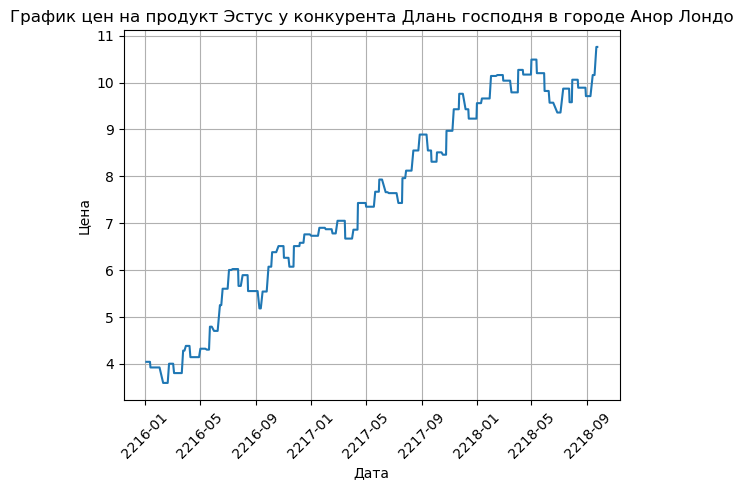

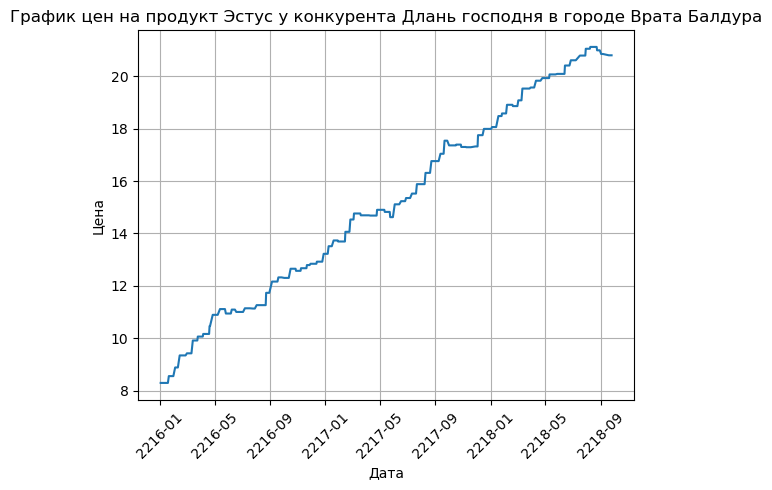

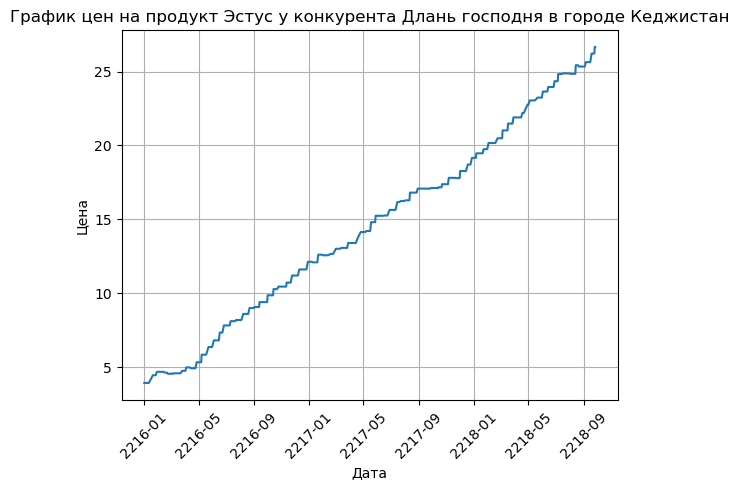

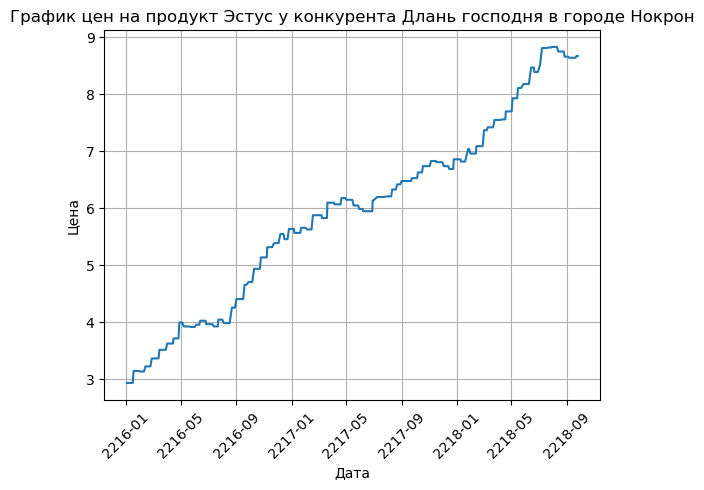

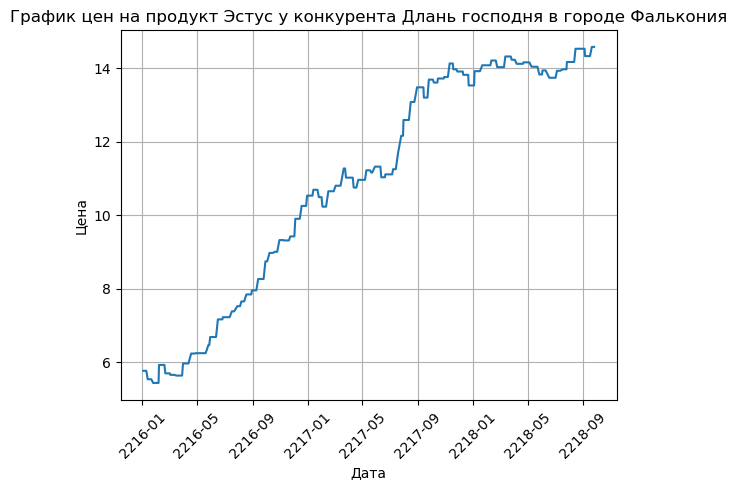

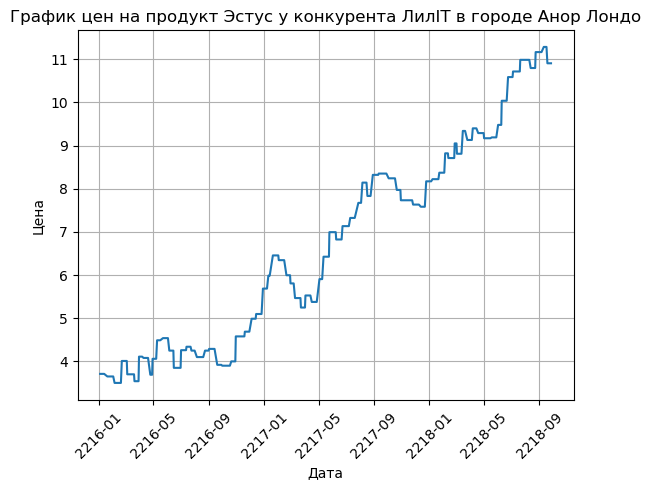

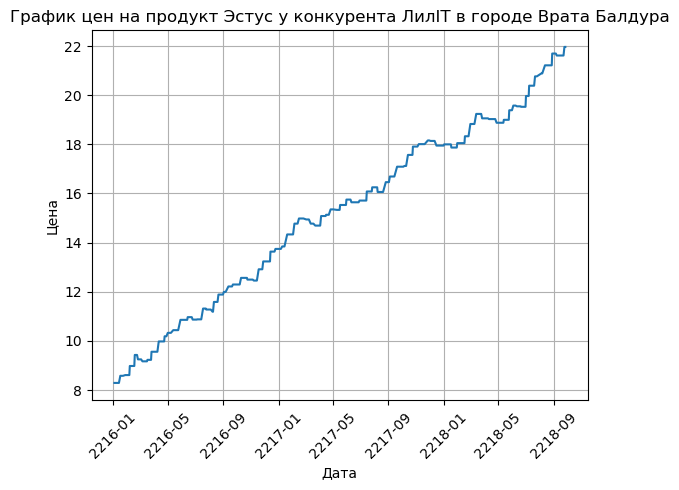

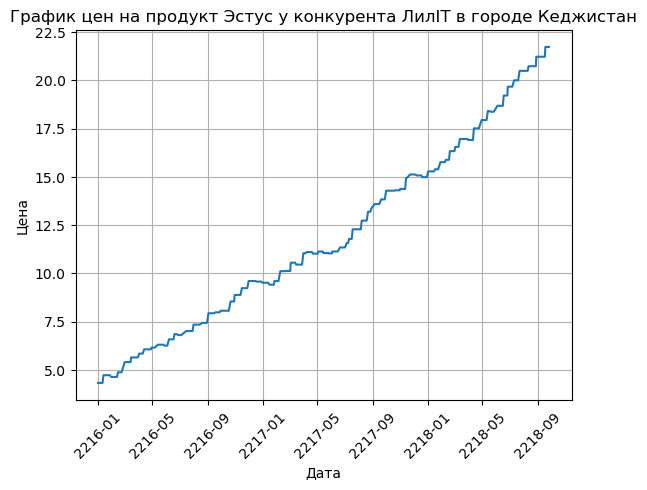

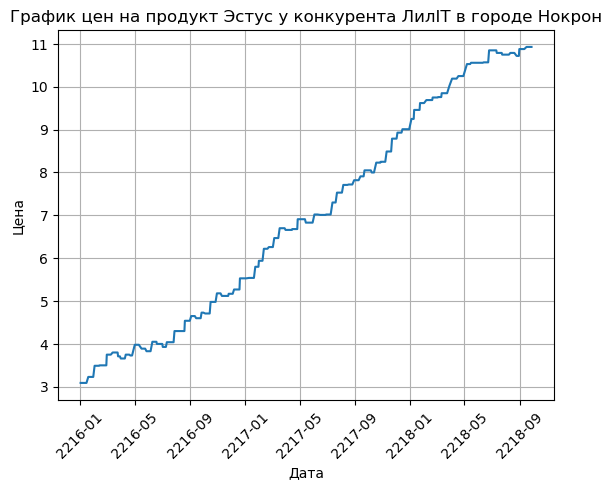

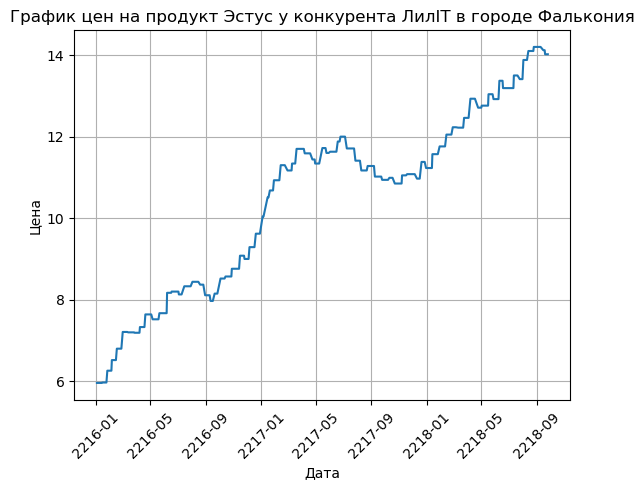

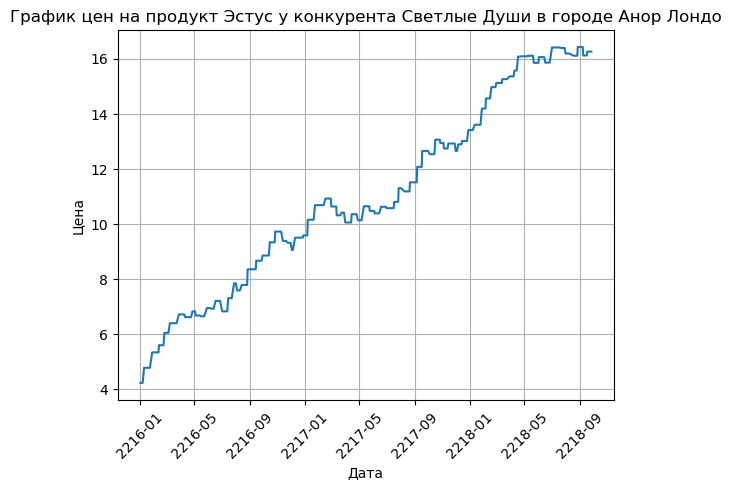

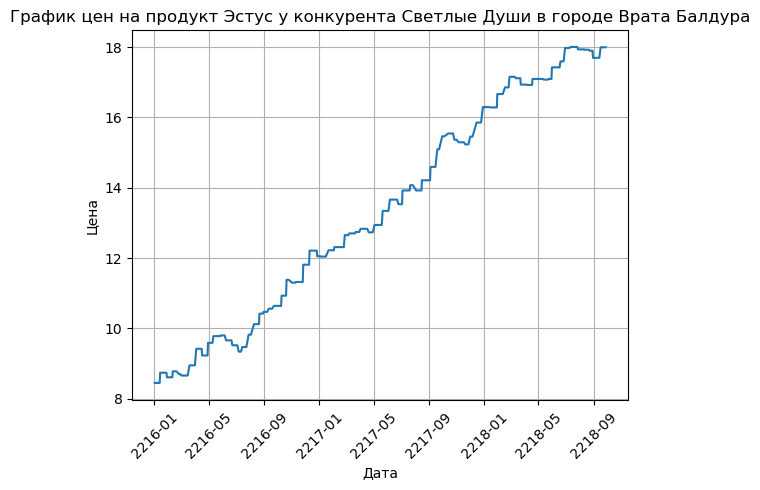

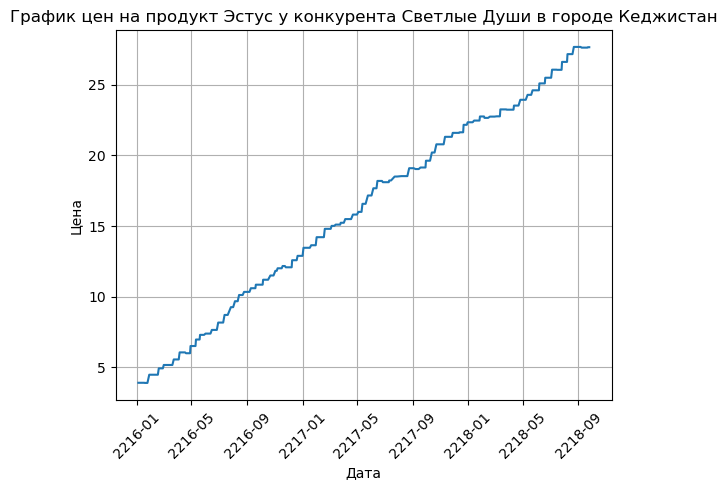

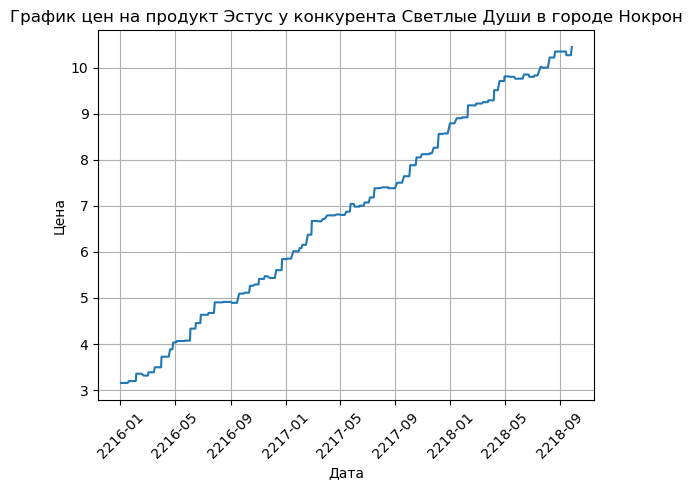

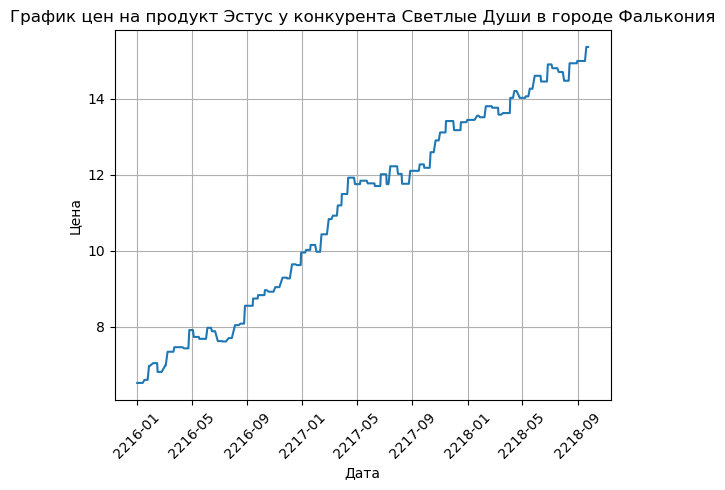

In [57]:
# Посмотрим изменения цен на товары у конкурентов в каждом городе
for product in products:
    for competitor in df_competitors['competitor'].unique():
        for city in cities:
            
            df_filtered = df_competitors[(df_competitors['product'] == product) & (df_competitors['competitor'] == competitor) & (df_competitors['place'] == city)]
            df_filtered = df_filtered.sort_values(by='date')
            plt.plot(df_filtered['date'], df_filtered['price'])
            
            plt.title(f'График цен на продукт {product} у конкурента {competitor} в городе {city}')
            plt.xlabel('Дата')
            plt.ylabel('Цена')
            
            plt.xticks(rotation=45)
            plt.grid()
            plt.show()

In [58]:
aggregated_df

place         product       date  price     amount
0      Анор Лондо  Целебные травы 2216-01-02   3.90  37.802874
1      Анор Лондо  Целебные травы 2216-01-03   3.90  43.264844
2      Анор Лондо  Целебные травы 2216-01-04   3.90  35.629889
3      Анор Лондо  Целебные травы 2216-01-05   3.90  37.474104
4      Анор Лондо  Целебные травы 2216-01-06   3.90  48.586827
...           ...             ...        ...    ...        ...
14993   Фалькония           Эстус 2218-09-23   9.28  58.409777
14994   Фалькония           Эстус 2218-09-24   9.28  48.620474
14995   Фалькония           Эстус 2218-09-25   9.28  59.634726
14996   Фалькония           Эстус 2218-09-26   9.28  52.100924
14997   Фалькония           Эстус 2218-09-27   9.28  44.656157

[14998 rows x 5 columns]

In [59]:
# Объединим данные конкурентов и компании на основе столбцов 'place', 'product' и 'date'
merged_data = pd.merge(df_competitors, aggregated_df, on=['place', 'product', 'date'])
merged_data.columns = ['place', 'product', 'competitor', 'competitor_price', 'date', 'company_price', 'amount']

# Вычислим разницу между ценой конкурента и ценой компании для каждого товара и города
merged_data['price_difference'] = merged_data['company_price'] - merged_data['competitor_price']
merged_data['price_difference_perc'] = round((merged_data['price_difference'] / merged_data['competitor_price']) * 100, 2)

merged_data

place         product    competitor  competitor_price       date  \
0      Анор Лондо  Целебные травы   Арториас&Co              3.78 2216-01-04   
1      Анор Лондо  Целебные травы         ЛилIT              4.18 2216-01-04   
2      Анор Лондо  Целебные травы   Арториас&Co              3.78 2216-01-05   
3      Анор Лондо  Целебные травы         ЛилIT              4.18 2216-01-05   
4      Анор Лондо  Целебные травы  Светлые Души              3.75 2216-01-05   
...           ...             ...           ...               ...        ...   
31790   Фалькония           Эстус  Светлые Души             14.80 2218-07-07   
31791   Фалькония           Эстус  Светлые Души             14.80 2218-07-08   
31792   Фалькония           Эстус  Светлые Души             14.47 2218-08-06   
31793   Фалькония           Эстус  Светлые Души             14.93 2218-08-27   
31794   Фалькония           Эстус  Светлые Души             14.99 2218-09-12   

       company_price     amount  price_difference  price_difference_perc  
0               3.90  35.629889              0.12                   3.17  
1               3.90  35.629889             -0.28                  -6.70  
2               3.90  37.474104              0.12                   3.17  
3               3.90  37.474104             -0.28                  -6.70  
4               3.90  37.474104              0.15                   4.00  
...              ...        ...               ...                    ...  
31790           9.70  50.307372             -5.10                 -34.46  
31791           9.70  33.479228             -5.10                 -34.46  
31792           9.69  38.268590             -4.78                 -33.03  
31793           9.29  41.855249             -5.64                 -37.78  
31794           9.13  51.216351             -5.86                 -39.09  

[31795 rows x 9 columns]

In [60]:
# Посмотрим на описательные характеристики для разницы в ценах
merged_data.groupby(['place', 'product'])['price_difference_perc'].agg(['min', 'max', 'mean'])

min    max       mean
place         product                                   
Анор Лондо    Целебные травы     -7.36  93.65  37.843714
              Эльфийская пыльца -24.71  29.60   0.996429
              Эстус             -55.97  53.23  -7.588801
Врата Балдура Целебные травы    -15.82  19.17   0.988662
              Эльфийская пыльца  -8.10  31.35   8.907255
              Эстус             -21.11  14.70  -5.198964
Кеджистан     Целебные травы    -24.66  38.67   9.091280
              Эльфийская пыльца -15.90  16.67  -0.735451
              Эстус             -19.98  41.05   5.589644
Нокрон        Целебные травы    -23.28  33.82   3.971423
              Эльфийская пыльца -10.34  29.42   7.202797
              Эстус             -20.41  23.70  -4.528045
Фалькония     Целебные травы    -39.32  11.46 -12.529972
              Эльфийская пыльца -34.89  32.20 -11.512416
              Эстус             -41.74  24.49 -20.492027

<a id="6"></a> 
## Анализ влияния погоды на продажи

In [61]:
df_weather

place  hot  rain  snow       date
0         Фалькония    0     0     0 2216-01-02
1        Анор Лондо    1     0     0 2216-01-02
2     Врата Балдура    0     0     1 2216-01-02
3            Нокрон    0     0     0 2216-01-02
4         Кеджистан    0     0     1 2216-01-02
...             ...  ...   ...   ...        ...
4995      Фалькония    0     0     0 2218-09-27
4996     Анор Лондо    0     0     1 2218-09-27
4997  Врата Балдура    1     0     0 2218-09-27
4998         Нокрон    0     0     0 2218-09-27
4999      Кеджистан    0     0     0 2218-09-27

[5000 rows x 5 columns]

In [62]:
aggregated_df

place         product       date  price     amount
0      Анор Лондо  Целебные травы 2216-01-02   3.90  37.802874
1      Анор Лондо  Целебные травы 2216-01-03   3.90  43.264844
2      Анор Лондо  Целебные травы 2216-01-04   3.90  35.629889
3      Анор Лондо  Целебные травы 2216-01-05   3.90  37.474104
4      Анор Лондо  Целебные травы 2216-01-06   3.90  48.586827
...           ...             ...        ...    ...        ...
14993   Фалькония           Эстус 2218-09-23   9.28  58.409777
14994   Фалькония           Эстус 2218-09-24   9.28  48.620474
14995   Фалькония           Эстус 2218-09-25   9.28  59.634726
14996   Фалькония           Эстус 2218-09-26   9.28  52.100924
14997   Фалькония           Эстус 2218-09-27   9.28  44.656157

[14998 rows x 5 columns]

In [63]:
# Объединим датафреймы
weather = pd.merge(aggregated_df, df_weather, on=["place", "date"])
weather

place            product       date  price     amount  hot  rain  \
0      Анор Лондо     Целебные травы 2216-01-02   3.90  37.802874    1     0   
1      Анор Лондо  Эльфийская пыльца 2216-01-02   9.21  52.490108    1     0   
2      Анор Лондо              Эстус 2216-01-02   3.60  46.831999    1     0   
3      Анор Лондо     Целебные травы 2216-01-03   3.90  43.264844    1     0   
4      Анор Лондо  Эльфийская пыльца 2216-01-03   9.21  43.957956    1     0   
...           ...                ...        ...    ...        ...  ...   ...   
14993   Фалькония  Эльфийская пыльца 2218-09-26  15.28  51.783693    0     0   
14994   Фалькония              Эстус 2218-09-26   9.28  52.100924    0     0   
14995   Фалькония     Целебные травы 2218-09-27  10.97  45.452870    0     0   
14996   Фалькония  Эльфийская пыльца 2218-09-27  15.28  45.144098    0     0   
14997   Фалькония              Эстус 2218-09-27   9.28  44.656157    0     0   

       snow  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
14993     1  
14994     1  
14995     0  
14996     0  
14997     0  

[14998 rows x 8 columns]

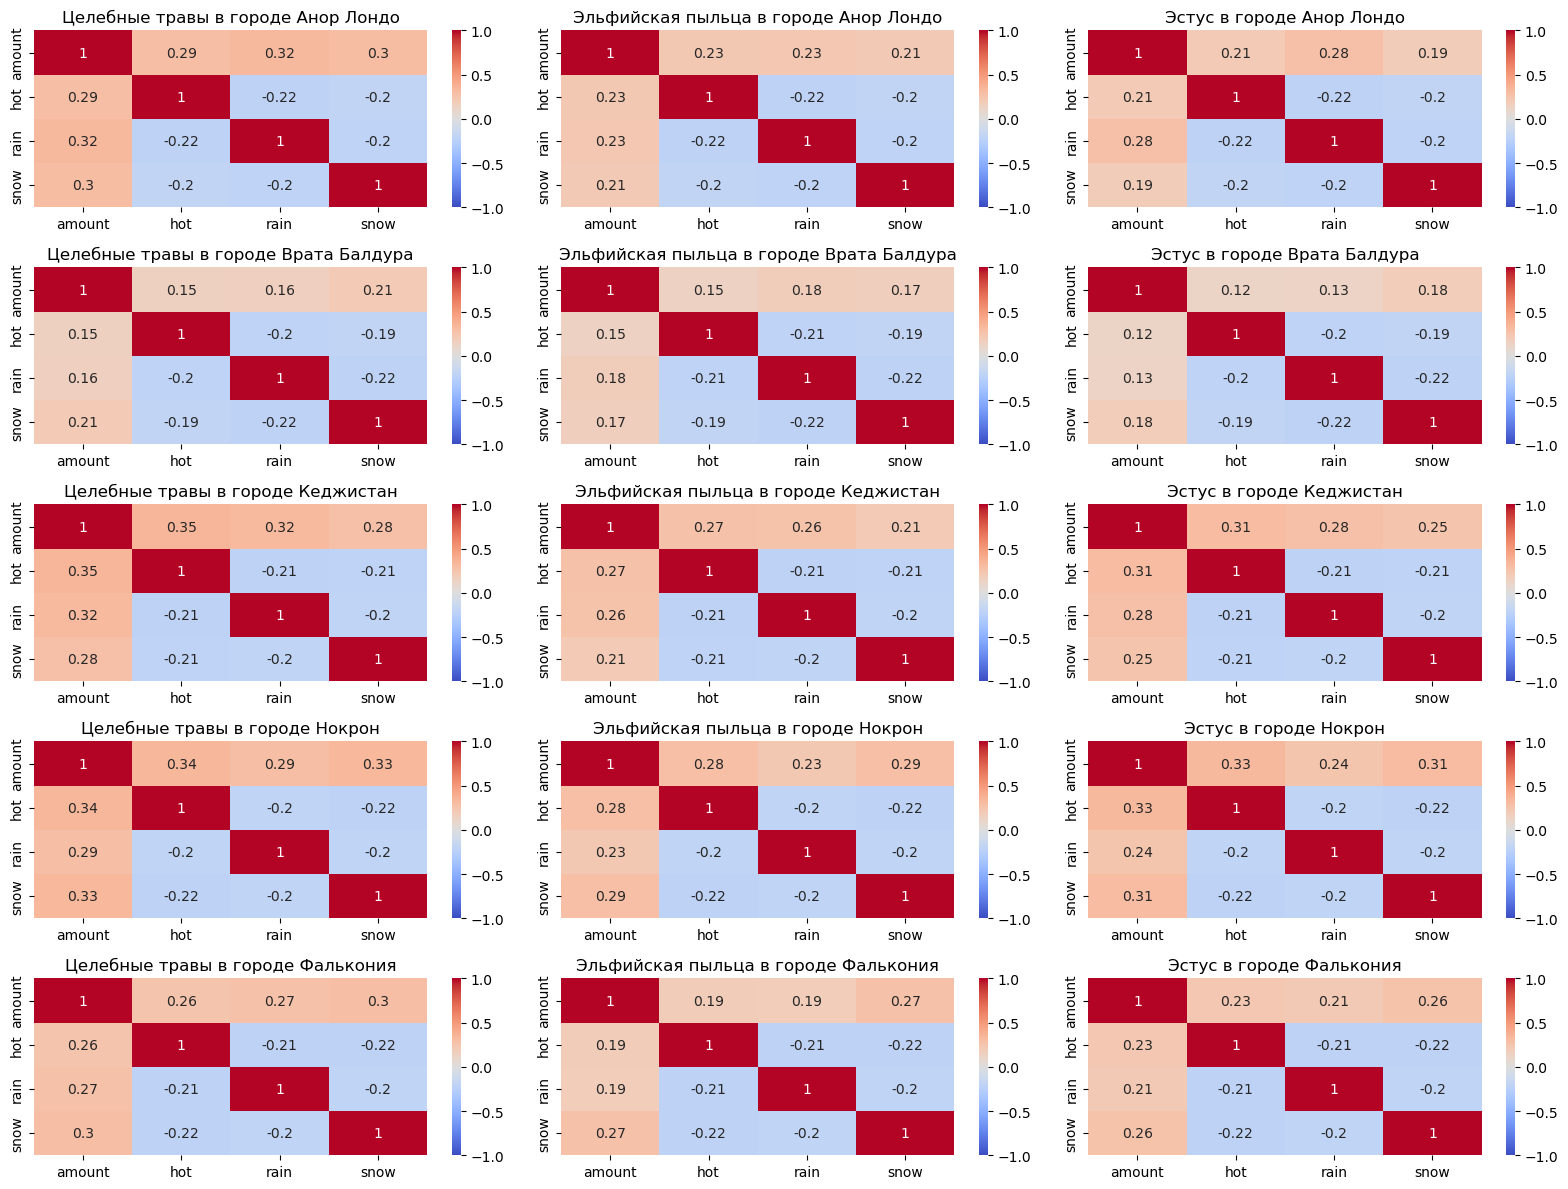

In [64]:
import itertools

# Создадим сетку графиков
fig, axs = plt.subplots(nrows=len(cities), ncols=len(products), figsize=(16, 12))

# Итерерируем по осям графиков и комбинации городов и товаров
for ax, (city, product) in zip(itertools.chain(*axs), itertools.product(cities, products)):
    # Отфильтруем данные по выбранному городу и товару
    subset = weather[(weather['place'] == city) & (weather['product'] == product)]
    
    # Рассчитаем матрицы корреляции для выбранных столбцов
    correlation = subset[["amount", "hot", "rain", "snow"]].corr()
    
    # Создадим тепловую карту для отображения корреляции
    sns.heatmap(correlation, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)
    
    # Установим заголовок графика
    ax.set_title(f"{product} в городе {city}")

plt.tight_layout()
plt.show()

## Экспорт результата

In [65]:
predictions.to_parquet("Решение от Хоменко Ивана Михайловича_Направление_Data Science.parquet")

Т.к. в результате решения задачи я не пришел к какому-либо конкретному результату, то, по сути, экспортировать нечего. Но меня обуяли сомнения, вдруг из-за отсутствия расписания цен как одного из атрибутов предоставления работы мое решение и отчет не рассмотрят, а очень хотелось бы получить обратную связь.

Поэтому было принято решение экспортировать хоть какой-то результат, который получился в результате выполнения задания, хоть и он не удовлетворяет изначальным условиям задания.
